### 🔹 Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# import string
# import re

from ydata_profiling import ProfileReport
import sweetviz as sv

from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import RidgeClassifier
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
# from sklearn.metrics import roc_curve, auc

c:\Users\fahad.imdad\Desktop\Projects\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import nltk
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet

# Download resources (run once)
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Error loading punkt: HTTP Error 503: Service Unavailable
[nltk_data] Error loading wordnet: HTTP Error 503: Service Unavailable
[nltk_data] Error loading omw-1.4: HTTP Error 503: Service Unavailable


False

### 🔹 Load Fake and True News Datasets

In [3]:
# https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset/data

fake_df = pd.read_csv(r"C:\Users\fahad.imdad\Desktop\Projects\Fake News\Fake.csv")
true_df = pd.read_csv(r"C:\Users\fahad.imdad\Desktop\Projects\Fake News\True.csv")

In [4]:
print("Fake News Count:", len(fake_df))
print("Real News Count:", len(true_df))


Fake News Count: 23481
Real News Count: 21417


### 🔹 Add Binary Labels

In [5]:
fake_df['label'] = 0
true_df['label'] = 1

### 🔹 Merge Both Datasets

In [6]:
df = pd.concat([fake_df, true_df], ignore_index=True)

### 🔹 Shuffle the Combined Dataset

In [7]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

### 🔹 Handle Missing/Duplicates

In [8]:
df = df.drop_duplicates()
df = df.dropna()

### 🔹 Drop Date column as we dont Need it

In [9]:
df = df.drop(columns=['date'])


### 🔹 Create Combined Content Column

In [10]:
df['content'] = df['title'] + " " + df['text']

### 🔹 Text Cleaning & Normalization

In [12]:
import re
import string

def clean_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Remove email addresses
    text = re.sub(r'\S+@\S+', '', text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text

In [13]:
df['clean_content'] = df['content'].apply(clean_text)

# lemmatization and stemming

In [18]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')  # for POS tagging if used


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\fahad.imdad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\fahad.imdad\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\fahad.imdad\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fahad.imdad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\fahad.imdad\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [15]:
import nltk
nltk.data.path.append("C:/Users/fahad.imdad/AppData/Roaming/nltk_data")

In [16]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer

lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def lemmatize_and_stem(text):
    words = word_tokenize(text)
    processed = []
    for word in words:
        lemma = lemmatizer.lemmatize(word)
        stem = stemmer.stem(lemma)
        processed.append(stem)
    return ' '.join(processed)


In [17]:
df['processed_content'] = df['clean_content'].apply(lemmatize_and_stem)


In [19]:
# Save selected columns to a new CSV file
df[['content', 'clean_content', 'processed_content']].to_csv('processed_news.csv', index=False)


In [20]:
# Save selected columns to a new CSV file
df[['content']].to_csv('content.csv', index=False)


In [21]:
df.isna().sum() # shows Missing Values


title                0
text                 0
subject              0
label                0
content              0
clean_content        0
processed_content    0
dtype: int64

### 🔹 Visualize Class Distribution

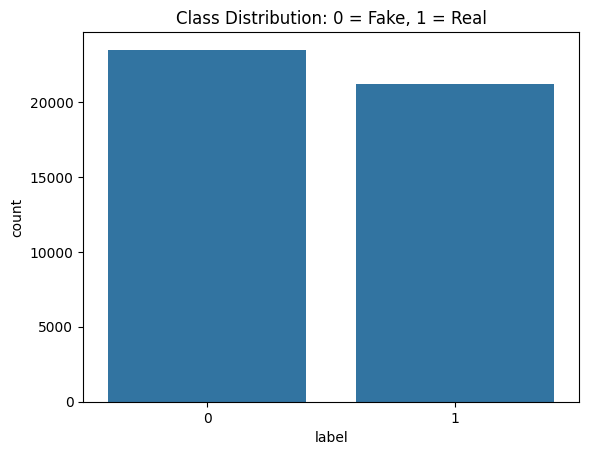

In [22]:
sns.countplot(x='label', data=df)
plt.title("Class Distribution: 0 = Fake, 1 = Real")
plt.show()

### 🔹 Word Cloud (Optional)

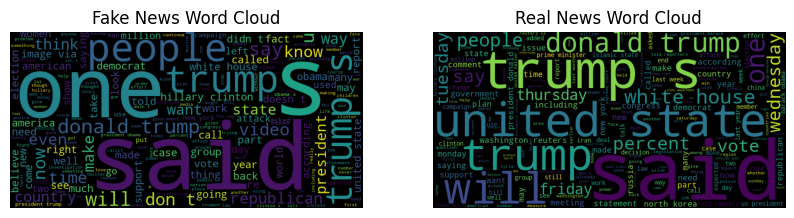

In [23]:
fake_words = ' '.join(df[df['label']==0]['clean_content'])
real_words = ' '.join(df[df['label']==1]['clean_content'])

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(WordCloud(width=800, height=400).generate(fake_words))
plt.title("Fake News Word Cloud")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(WordCloud(width=800, height=400).generate(real_words))
plt.title("Real News Word Cloud")
plt.axis('off')
plt.show()

### 🔹AutoEDA Using Panda Profiling

In [ ]:
# ✅ Generate the profile report
profile = ProfileReport(df, title="Fake News Sample Report", explorative=True)

# ✅ Save to file (adjust path if needed)
profile.to_file(r"C:\Users\fahad.imdad\Desktop\Projects\Fake News\Fake_News_Sample_Report.html")


Summarize dataset:  42%|████▏     | 5/12 [04:28<06:15, 53.66s/it, Describe variable: processed_content]


MemoryError: Unable to allocate 1.41 GiB for an array with shape (94910250,) and data type complex128

In [ ]:
import webbrowser
webbrowser.open(r"C:\Users\fahad.imdad\Desktop\Projects\Fake News\Fake_News_Sample_Report.html")


True

### 🔹AutoEDA Using Sweetviz

In [ ]:
report = sv.analyze(df)
report.show_html('Sweetviz_Report.html')

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


Report Sweetviz_Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### 🔹 Vectorize Text using TF-IDF

In [24]:
# Step 1: Initialize the vectorizer
vectorizer = TfidfVectorizer(
    stop_words='english',     # removes common English stopwords+
    max_features=5000,        # keep top 5000 words (adjustable)
    lowercase=True,           # just in case your clean_content missed anything
    strip_accents='unicode',  # normalize accents (é → e)
    ngram_range=(1, 2),       # include unigrams AND bigrams for more context
)

# Step 2: Fit & transform the cleaned text
X = vectorizer.fit_transform(df['clean_content'])

# Step 3: Target variable
y = df['label']

In [25]:
print(vectorizer.get_feature_names_out()[:20])  # Show first 20 words

['abandon' 'abandoned' 'abbas' 'abc' 'abc news' 'abdullah' 'abe' 'abedin'
 'ability' 'able' 'abortion' 'abortions' 'abroad' 'absolute' 'absolutely'
 'abu' 'abuse' 'abuses' 'academic' 'accept']


### 🔹 Train-Test Split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔷 Machine Learning

## 🔹 Define & Train Models

In [27]:
# Define all models
models = {
    "Logistic Regression": LogisticRegression(solver='liblinear', max_iter=1000),
    "Linear SVM": LinearSVC(max_iter=1000),
    "Ridge Classifier": RidgeClassifier(),
    "Multinomial NB": MultinomialNB(),
    "Bernoulli NB": BernoulliNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
}

# Train all models and store them
trained_models = {}

for name, model in models.items():
    print(f"🔧 Training: {name}")
    model.fit(X_train, y_train)
    trained_models[name] = model


🔧 Training: Logistic Regression
🔧 Training: Linear SVM
🔧 Training: Ridge Classifier
🔧 Training: Multinomial NB
🔧 Training: Bernoulli NB
🔧 Training: Random Forest
🔧 Training: Gradient Boosting
🔧 Training: KNN


# 🔷 Evaluation

### 🔹 Evaluation Function

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, roc_curve, auc
)

def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f"📊 {name}")
    print(f"Accuracy : {acc:.2f}")
    print(f"Precision: {prec:.2f}")
    print(f"Recall   : {rec:.2f}")
    print(f"F1 Score : {f1:.2f}")

    # 🔷 Confusion Matrix
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

    # 🔶 ROC Curve
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_prob = model.decision_function(X_test)
    else:
        y_prob = None

    if y_prob is not None:
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        auc_score = auc(fpr, tpr)

        plt.figure(figsize=(5, 4))
        plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
        plt.plot([0, 1], [0, 1], 'k--', label='Random')
        plt.title(f"ROC Curve - {name}")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    return {
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1
    }


### 🔹 Evaluate All Models

📊 Logistic Regression
Accuracy : 0.99
Precision: 0.99
Recall   : 0.99
F1 Score : 0.99


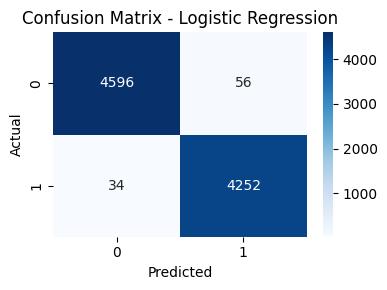

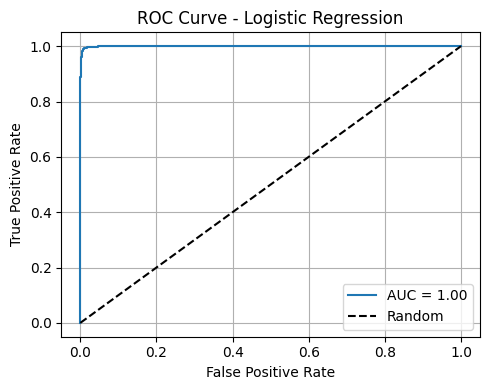

📊 Linear SVM
Accuracy : 1.00
Precision: 1.00
Recall   : 1.00
F1 Score : 1.00


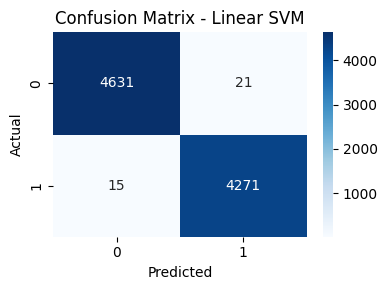

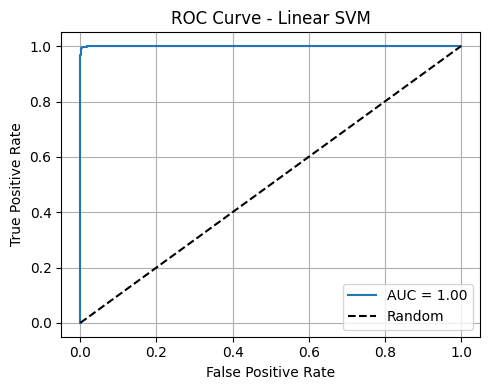

📊 Ridge Classifier
Accuracy : 0.99
Precision: 0.99
Recall   : 1.00
F1 Score : 0.99


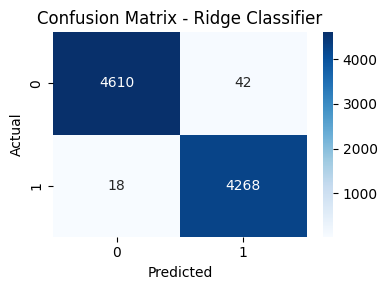

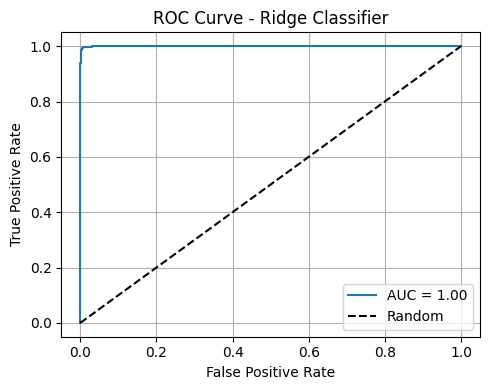

📊 Multinomial NB
Accuracy : 0.94
Precision: 0.94
Recall   : 0.94
F1 Score : 0.94


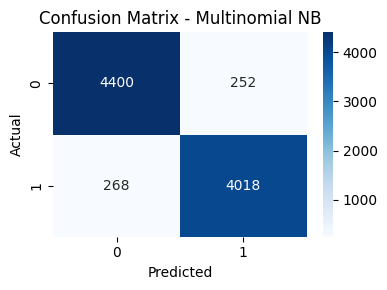

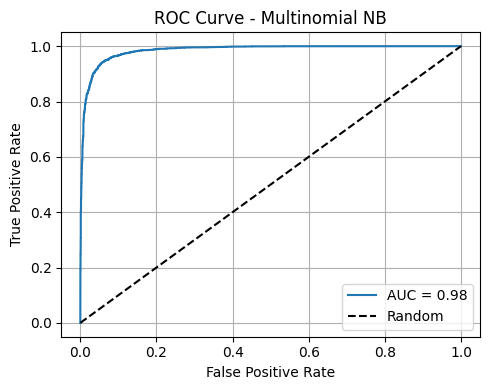

📊 Bernoulli NB
Accuracy : 0.97
Precision: 0.97
Recall   : 0.97
F1 Score : 0.97


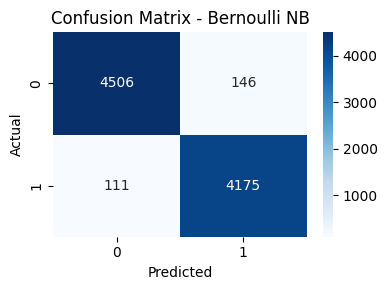

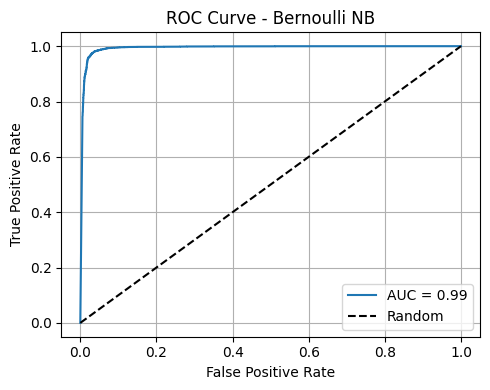

📊 Random Forest
Accuracy : 1.00
Precision: 1.00
Recall   : 1.00
F1 Score : 1.00


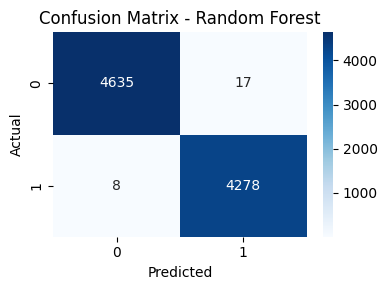

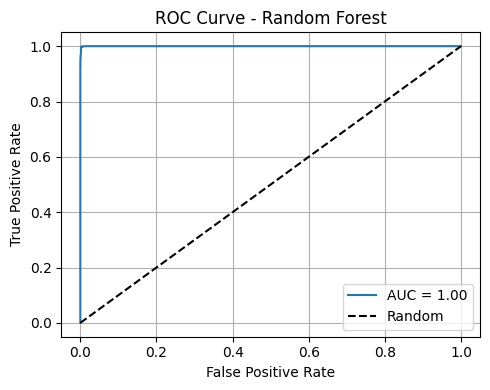

📊 Gradient Boosting
Accuracy : 1.00
Precision: 0.99
Recall   : 1.00
F1 Score : 1.00


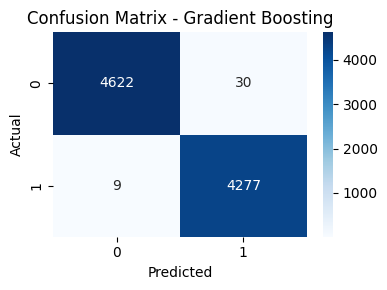

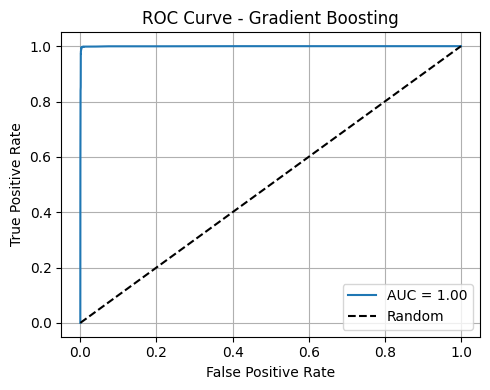

📊 KNN
Accuracy : 0.72
Precision: 0.93
Recall   : 0.45
F1 Score : 0.61


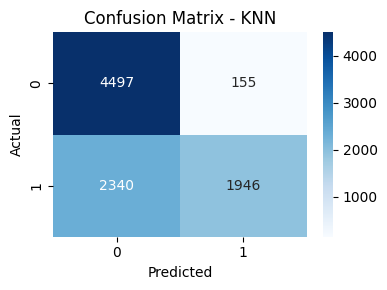

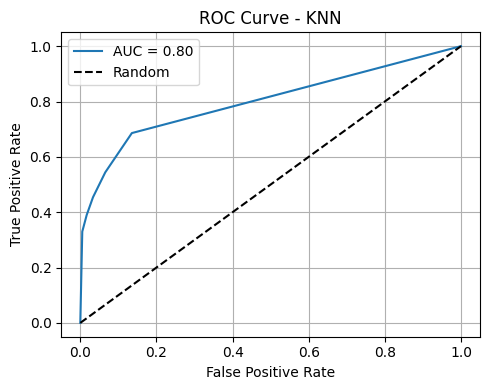

In [29]:
all_results = []

for name, model in trained_models.items():
    result = evaluate_model(name, model, X_test, y_test)
    all_results.append(result)


### 🔹 Comparison Table

In [30]:
results_df = pd.DataFrame(all_results).sort_values(by="F1 Score", ascending=False)
results_df.reset_index(drop=True, inplace=True)
results_df


,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.997203,0.996042,0.998133,0.997087
1,Linear SVM,0.995972,0.995107,0.996500,0.995803
2,Gradient Boosting,0.995637,0.993035,0.997900,0.995461
3,Ridge Classifier,0.993287,0.990255,0.995800,0.993020
4,Logistic Regression,0.989931,0.987001,0.992067,0.989528
5,Bernoulli NB,0.971246,0.966212,0.974102,0.970141
6,Multinomial NB,0.941821,0.940984,0.937471,0.939224
7,KNN,0.720855,0.926226,0.454036,0.609363


### 🔹 Model Performance Comparison for All Models

C:\Users\fahad.imdad\AppData\Local\Temp\ipykernel_6856\3668537921.py:7: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\fahad.imdad\Desktop\Projects\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


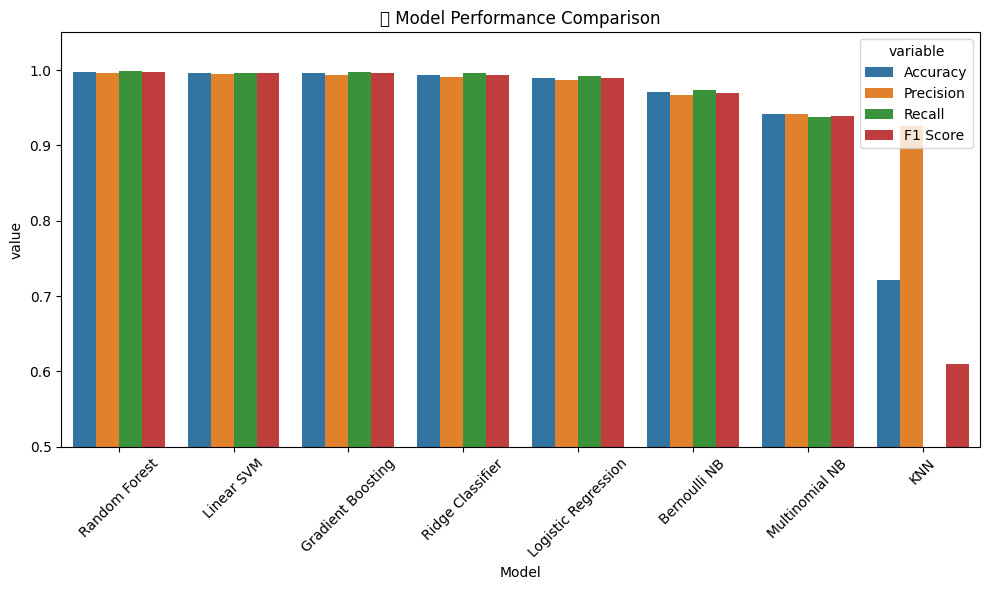

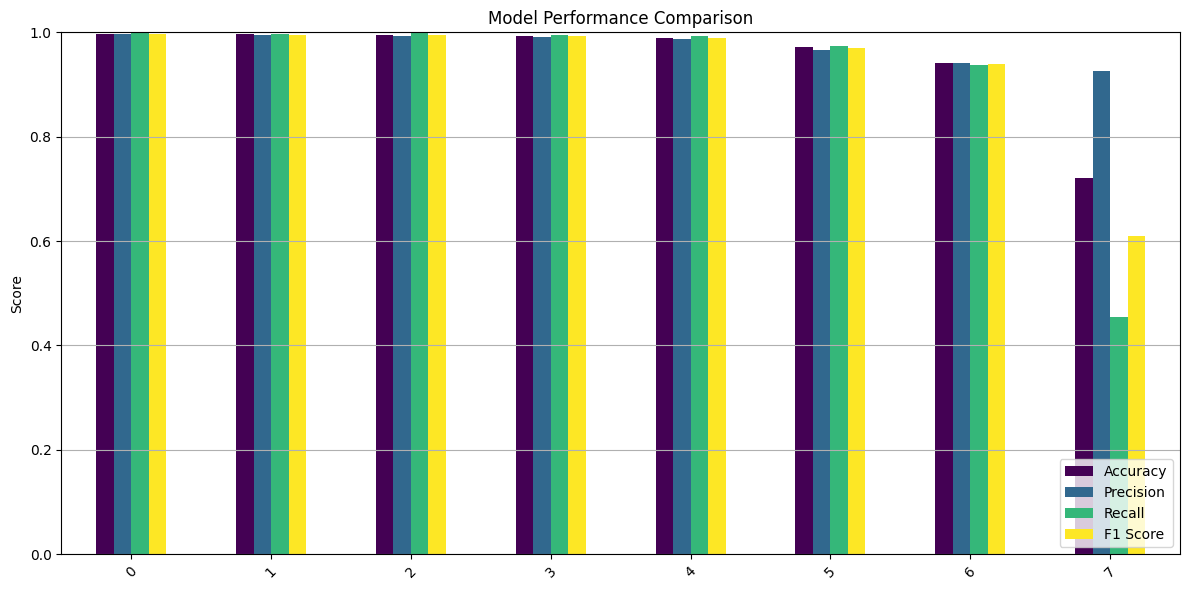

In [ ]:
plt.figure(figsize=(10, 6))
melted = results_df.melt(id_vars="Model", value_vars=["Accuracy", "Precision", "Recall", "F1 Score"])
sns.barplot(data=melted, x='Model', y='value', hue='variable')
plt.title("📈 Model Performance Comparison")
plt.xticks(rotation=45)
plt.ylim(0.5, 1.05)
plt.tight_layout()
plt.show()

results_df.plot(kind='bar', figsize=(12, 6), colormap='viridis')
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


### 🔹 confusion matrix for All Models

C:\Users\fahad.imdad\AppData\Local\Temp\ipykernel_16540\1339269106.py:32: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
c:\Users\fahad.imdad\Desktop\Projects\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


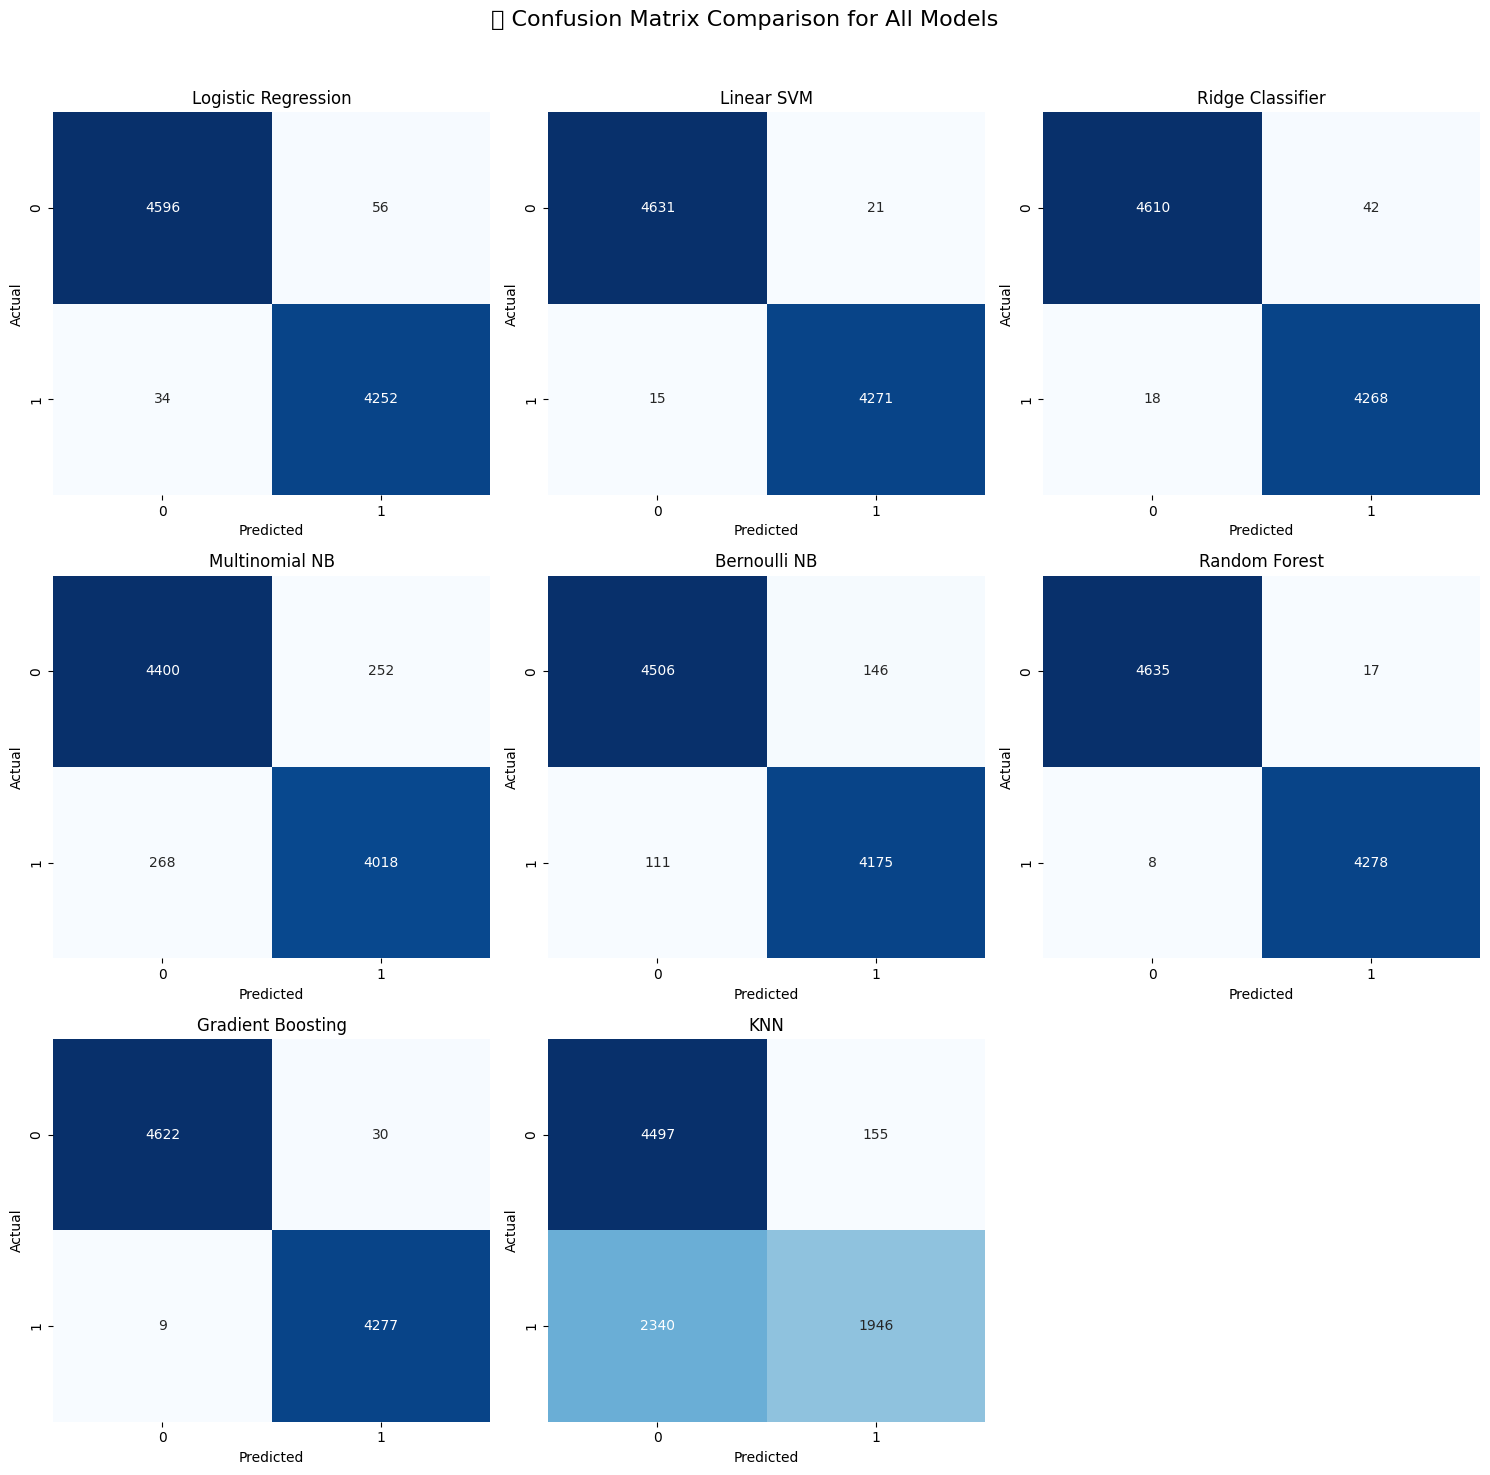

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Total models
n_models = len(trained_models)

# Grid size (3 columns)
cols = 3
rows = math.ceil(n_models / cols)

# Create subplot grid
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()  # Flatten to index easily

# Plot confusion matrix for each model
for i, (name, model) in enumerate(trained_models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i], cbar=False)
    axes[i].set_title(name)
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")

# Remove extra empty plots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("📉 Confusion Matrix Comparison for All Models", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


### 🔹 ROC Curves for All Models

C:\Users\fahad.imdad\AppData\Local\Temp\ipykernel_16764\1638878378.py:41: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Roboto.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
C:\Users\fahad.imdad\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Roboto.
  fig.canvas.print_figure(bytes_io, **kw)


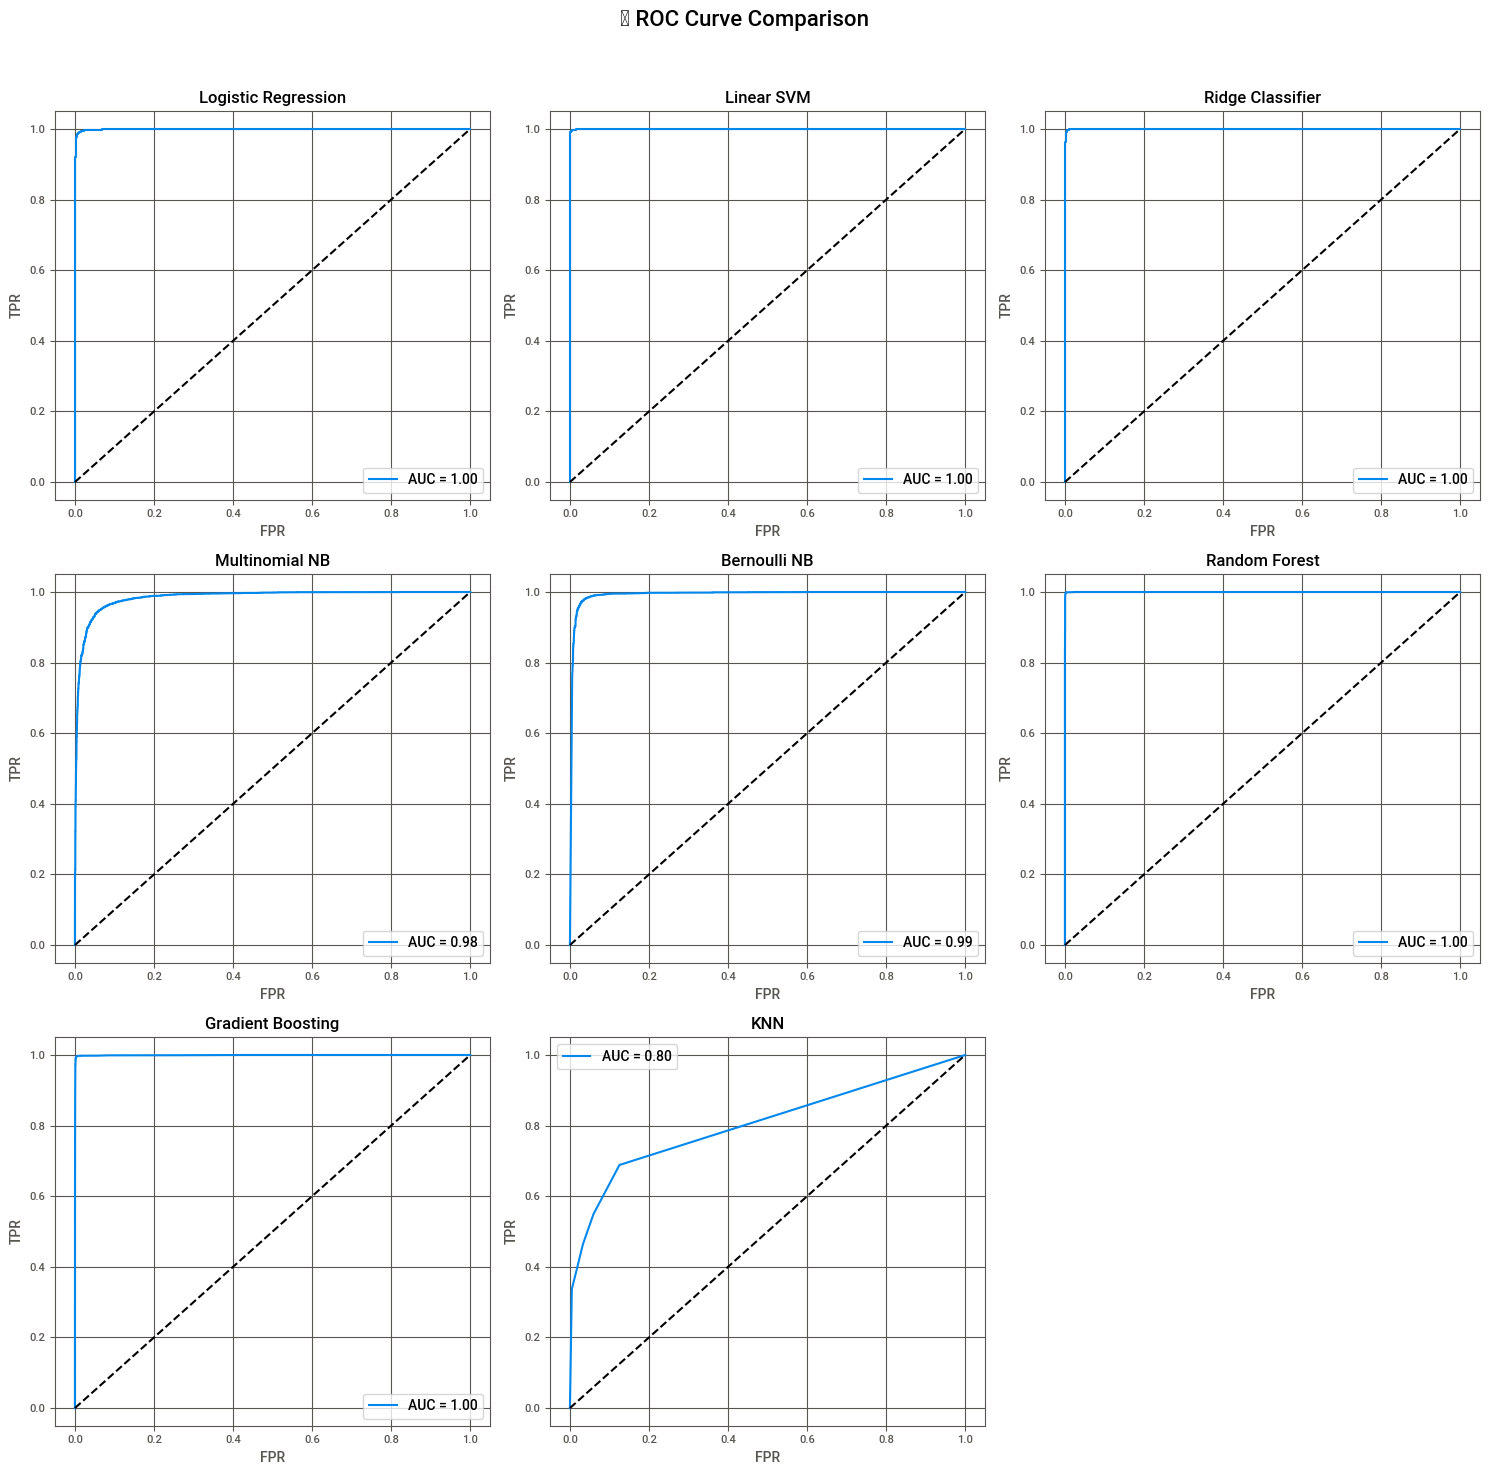

In [ ]:
from sklearn.metrics import roc_curve, auc
import math

n_models = len(trained_models)
cols = 3
rows = math.ceil(n_models / cols)

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()

for i, (name, model) in enumerate(trained_models.items()):
    # Try to get probabilities
    try:
        if hasattr(model, "predict_proba"):
            y_prob = model.predict_proba(X_test)[:, 1]
        elif hasattr(model, "decision_function"):
            y_prob = model.decision_function(X_test)
        else:
            continue

        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)

        axes[i].plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
        axes[i].plot([0, 1], [0, 1], 'k--')
        axes[i].set_title(name)
        axes[i].set_xlabel("FPR")
        axes[i].set_ylabel("TPR")
        axes[i].legend()
        axes[i].grid(True)

    except Exception as e:
        axes[i].text(0.5, 0.5, "No ROC", ha='center', va='center')
        axes[i].set_title(name)

# Remove extra axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("📈 ROC Curve Comparison", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


### 🔹 Precision-Recall Curves for All Models

C:\Users\fahad.imdad\AppData\Local\Temp\ipykernel_16764\3433271606.py:31: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Roboto.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
C:\Users\fahad.imdad\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Roboto.
  fig.canvas.print_figure(bytes_io, **kw)


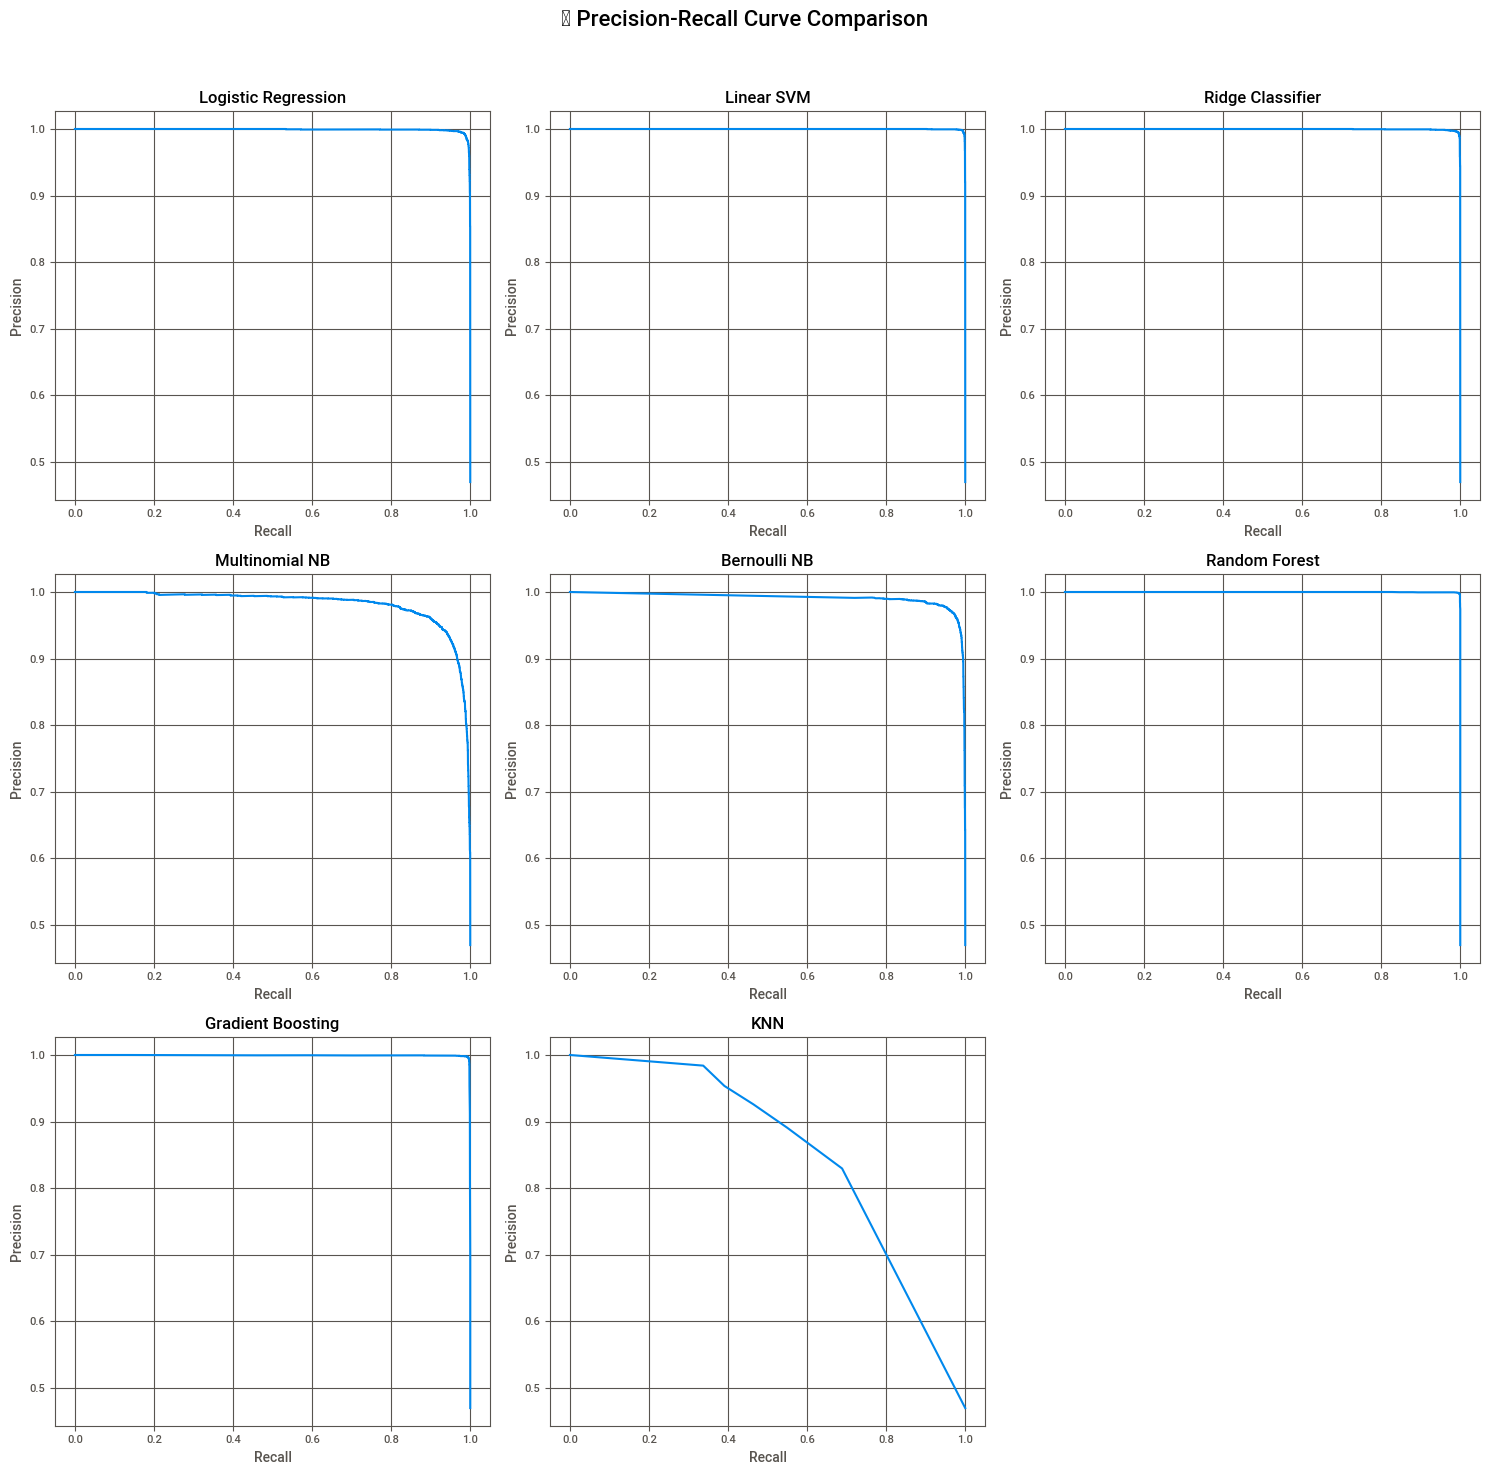

In [ ]:
from sklearn.metrics import precision_recall_curve

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()

for i, (name, model) in enumerate(trained_models.items()):
    try:
        if hasattr(model, "predict_proba"):
            y_scores = model.predict_proba(X_test)[:, 1]
        elif hasattr(model, "decision_function"):
            y_scores = model.decision_function(X_test)
        else:
            continue

        precision, recall, _ = precision_recall_curve(y_test, y_scores)

        axes[i].plot(recall, precision, label=name)
        axes[i].set_title(name)
        axes[i].set_xlabel("Recall")
        axes[i].set_ylabel("Precision")
        axes[i].grid(True)

    except:
        axes[i].text(0.5, 0.5, "Not Available", ha='center', va='center')
        axes[i].set_title(name)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("📉 Precision-Recall Curve Comparison", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


### 🔹 ROC Curve Comparison for All Models

C:\Users\fahad.imdad\AppData\Local\Temp\ipykernel_16764\689682472.py:33: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Roboto.
  plt.tight_layout()
C:\Users\fahad.imdad\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Roboto.
  fig.canvas.print_figure(bytes_io, **kw)


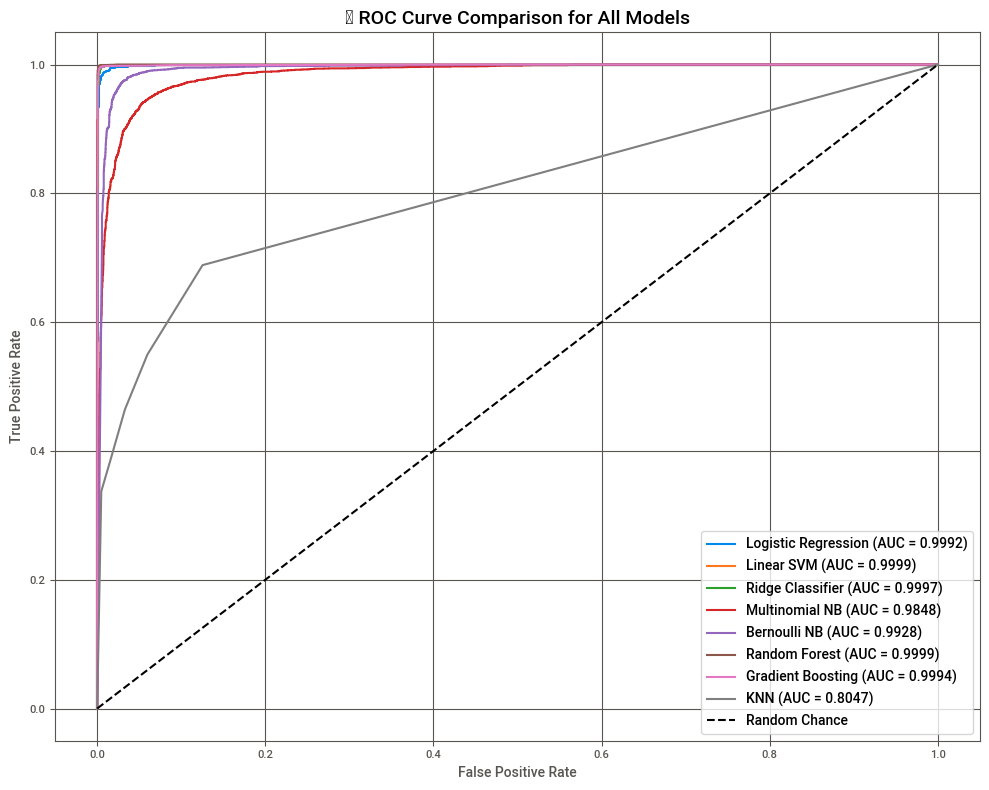

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

for name, model in trained_models.items():
    try:
        # Use probability if available
        if hasattr(model, "predict_proba"):
            y_proba = model.predict_proba(X_test)[:, 1]
        elif hasattr(model, "decision_function"):
            y_proba = model.decision_function(X_test)
        else:
            print(f"⚠️ {name} skipped — no probability or decision function.")
            continue

        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.4f})')

    except Exception as e:
        print(f"❌ {name} failed: {e}")

# Random classifier line
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')

# Plot styling
plt.title('📈 ROC Curve Comparison for All Models', fontsize=14)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


#### Calibration Curve

⚠️ Linear SVM skipped: no predict_proba.
⚠️ Ridge Classifier skipped: no predict_proba.


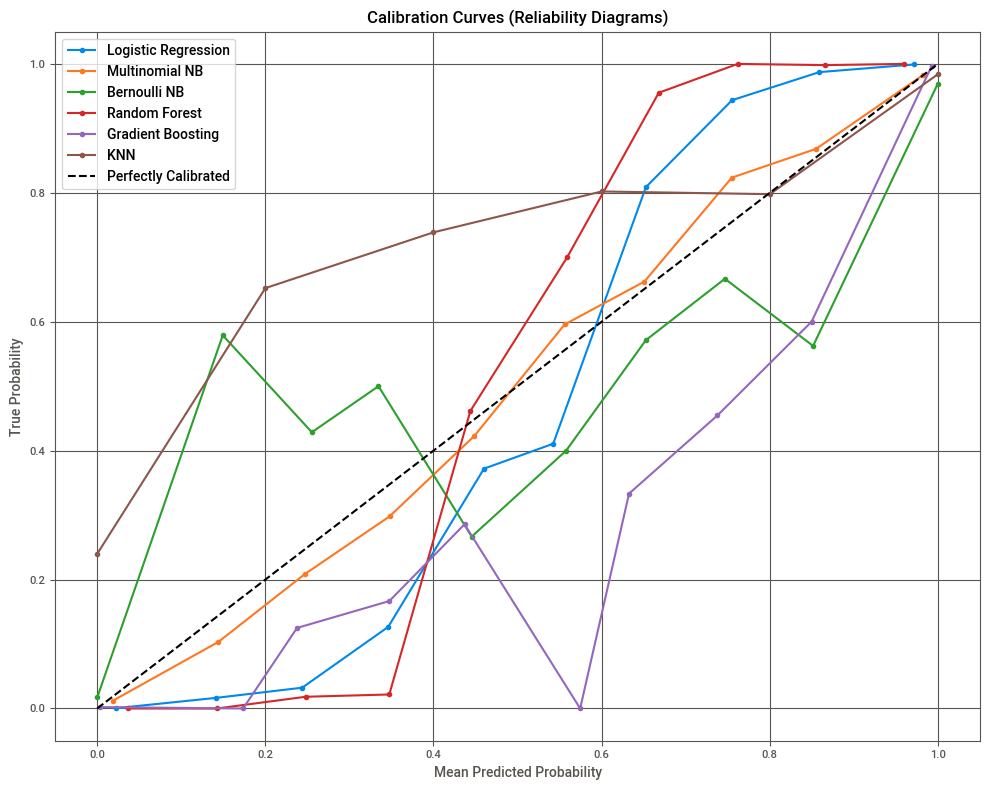

In [ ]:
from sklearn.calibration import calibration_curve

plt.figure(figsize=(10, 8))

for name, model in trained_models.items():
    try:
        if hasattr(model, "predict_proba"):
            y_proba = model.predict_proba(X_test)[:, 1]
        else:
            print(f"⚠️ {name} skipped: no predict_proba.")
            continue

        if np.min(y_proba) < 0 or np.max(y_proba) > 1:
            print(f"❌ {name} skipped: y_proba out of [0, 1] range.")
            continue

        prob_true, prob_pred = calibration_curve(y_test, y_proba, n_bins=10, strategy='uniform')
        plt.plot(prob_pred, prob_true, marker='o', label=name)

    except Exception as e:
        print(f"❌ {name} failed: {e}")

plt.plot([0, 1], [0, 1], 'k--', label='Perfectly Calibrated')
plt.title("Calibration Curves (Reliability Diagrams)")
plt.xlabel("Mean Predicted Probability")
plt.ylabel("True Probability")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### 🔷  30. Compare Model Performances

#### Define a function to evaluate and return metrics

In [ ]:
def get_model_scores(name, model, X_test, y_test, proba=False):
    if hasattr(model, "predict_proba") and proba:
        y_pred = model.predict_proba(X_test)[:, 1]
        y_pred = np.round(y_pred)
    else:
        y_pred = model.predict(X_test)
    
    if hasattr(y_pred, 'flatten'):
        y_pred = np.round(y_pred.flatten())
    
    return {
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    }

#### Collect scores from all ML models

In [ ]:
results = []

results.append(get_model_scores("Logistic Regression", lr, X_test, y_test, proba=True))
results.append(get_model_scores("Multinomial NB", nb, X_test, y_test))
results.append(get_model_scores("Linear SVC", svc, X_test, y_test))
results.append(get_model_scores("Random Forest", rf, X_test, y_test, proba=True))
results.append(get_model_scores("Gradient Boosting", xgb, X_test, y_test, proba=True))
results.append(get_model_scores("KNN", knn, X_test, y_test))

#### Create a DataFrame

In [ ]:
results_df = pd.DataFrame(results)
results_df.set_index('Model', inplace=True)
print(results_df)

                     Accuracy  Precision    Recall  F1 Score
Model                                                       
Logistic Regression  0.987245   0.984426  0.989024  0.986719
Multinomial NB       0.936339   0.935287  0.931574  0.933427
Linear SVC           0.994294   0.994160  0.993928  0.994044
Random Forest        0.997762   0.998130  0.997198  0.997664
Gradient Boosting    0.997650   0.997664  0.997431  0.997548
KNN                  0.888789   0.853701  0.926670  0.888690


#### Plot Comparison Chart

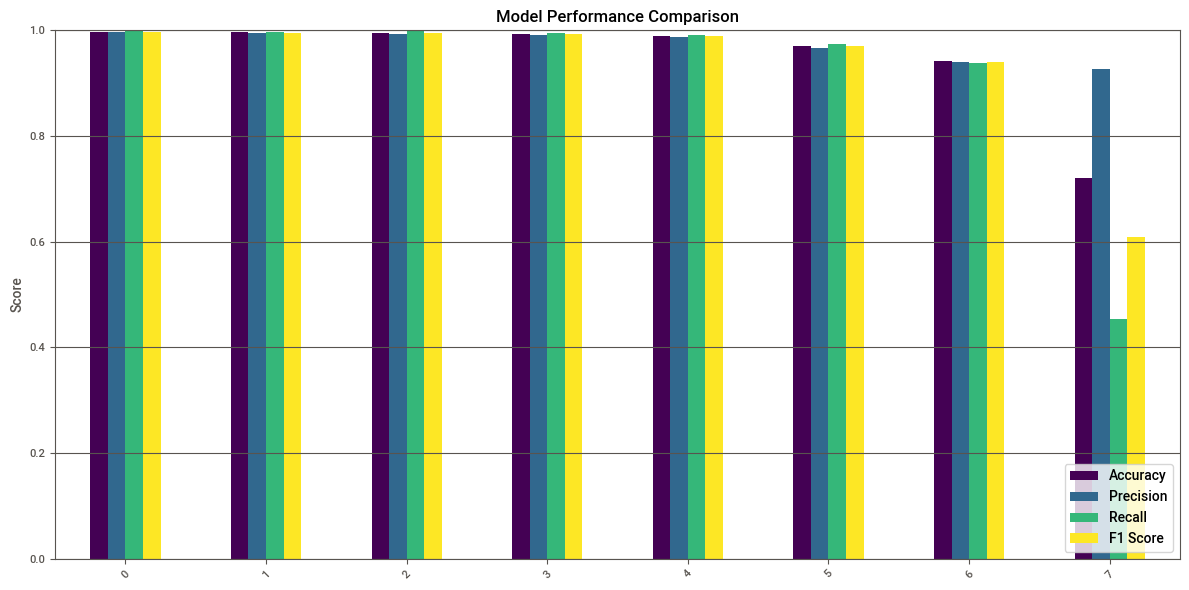

In [ ]:
results_df.plot(kind='bar', figsize=(12, 6), colormap='viridis')
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

#### Precision-Recall (PR) Curve

C:\Users\Administrator\AppData\Local\Temp\ipykernel_30708\1192969100.py:29: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Roboto.
  plt.tight_layout()
c:\Users\Administrator\Downloads\New folder\Projects\Projects\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Roboto.
  fig.canvas.print_figure(bytes_io, **kw)


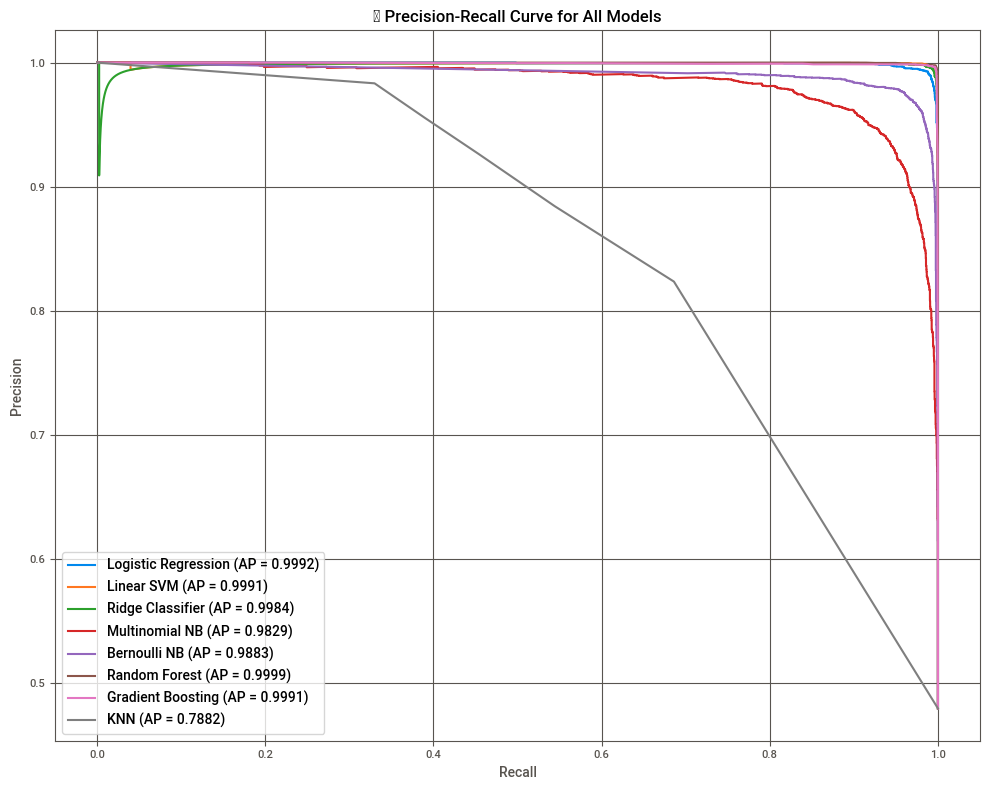

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

for name, model in trained_models.items():
    try:
        if hasattr(model, "predict_proba"):
            y_score = model.predict_proba(X_test)[:, 1]
        elif hasattr(model, "decision_function"):
            y_score = model.decision_function(X_test)
        else:
            print(f"⚠️ {name} skipped: no predict_proba or decision_function")
            continue

        precision, recall, _ = precision_recall_curve(y_test, y_score)
        ap_score = average_precision_score(y_test, y_score)

        plt.plot(recall, precision, label=f'{name} (AP = {ap_score:.4f})')

    except Exception as e:
        print(f"❌ {name} failed: {e}")

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('📉 Precision-Recall Curve for All Models')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()
plt.show()


#### Prediction Probability Histogram

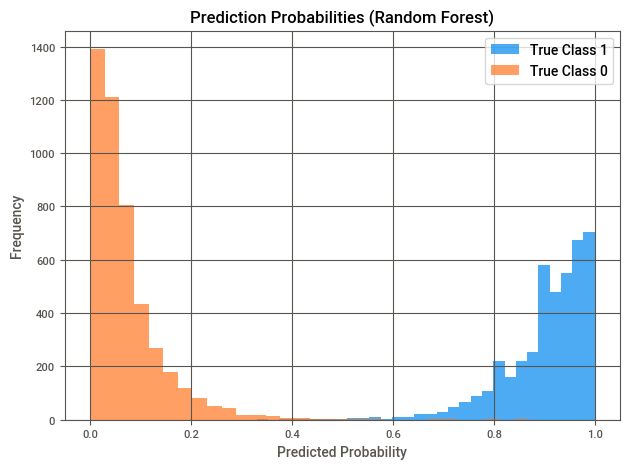

In [ ]:
y_proba = rf.predict_proba(X_test)[:, 1]
plt.hist(y_proba[y_test == 1], bins=30, alpha=0.7, label='True Class 1')
plt.hist(y_proba[y_test == 0], bins=30, alpha=0.7, label='True Class 0')
plt.title("Prediction Probabilities (Random Forest)")
plt.xlabel("Predicted Probability")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# 🔷 Deep Learning

## 🔷 Imports

In [ ]:
# import tensorflow as tf
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Conv1D, GlobalMaxPooling1D
# from transformers import BertTokenizer, TFBertForSequenceClassification

## 🔷 Models

### 🔹 22. Preprocess for DL

In [ ]:
# tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
# tokenizer.fit_on_texts(df['clean_content'])

# sequences = tokenizer.texts_to_sequences(df['clean_content'])
# padded = pad_sequences(sequences, maxlen=500)

# X_dl_train, X_dl_test, y_dl_train, y_dl_test = train_test_split(padded, y, test_size=0.2, random_state=42)

### 🔹 23. LSTM Model

In [ ]:
# lstm_model = Sequential([
#     Embedding(5000, 64, input_length=500),
#     LSTM(64),
#     Dense(1, activation='sigmoid')
# ])
# lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# lstm_model.fit(X_dl_train, y_dl_train, epochs=5, batch_size=64, validation_data=(X_dl_test, y_dl_test))

### 🔹 24. BiLSTM

In [ ]:
# bilstm_model = Sequential([
#     Embedding(5000, 64, input_length=500),
#     Bidirectional(LSTM(64)),
#     Dense(1, activation='sigmoid')
# ])
# bilstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# bilstm_model.fit(X_dl_train, y_dl_train, epochs=5, batch_size=64, validation_data=(X_dl_test, y_dl_test))

### 🔹 25. CNN for Text Classification

In [ ]:
# cnn_model = Sequential([
#     Embedding(5000, 64, input_length=500),
#     Conv1D(128, 5, activation='relu'),
#     GlobalMaxPooling1D(),
#     Dense(1, activation='sigmoid')
# ])
# cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# cnn_model.fit(X_dl_train, y_dl_train, epochs=5, batch_size=64, validation_data=(X_dl_test, y_dl_test))

### 🔹 26. BERT Transformer

In [ ]:
# bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
# bert_model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased')

# # Further preprocessing and training omitted for brevity

## 🔷 Evaluation

### 🔷  31. Deep Learning Models - Performance Table

#### Define evaluation function for Keras models

In [ ]:
# def evaluate_keras_model(name, model, X_test, y_test):
#     y_pred_probs = model.predict(X_test)
#     y_pred = np.round(y_pred_probs).flatten()
    
#     return {
#         'Model': name,
#         'Accuracy': accuracy_score(y_test, y_pred),
#         'Precision': precision_score(y_test, y_pred),
#         'Recall': recall_score(y_test, y_pred),
#         'F1 Score': f1_score(y_test, y_pred)
#     }

#### Get metrics from DL models

In [ ]:
# dl_results = []

# dl_results.append(evaluate_keras_model("LSTM", lstm_model, X_dl_test, y_dl_test))
# dl_results.append(evaluate_keras_model("BiLSTM", bilstm_model, X_dl_test, y_dl_test))
# dl_results.append(evaluate_keras_model("CNN", cnn_model, X_dl_test, y_dl_test))

#### Combine ML and DL results

In [ ]:
# all_results_df = pd.concat([results_df, pd.DataFrame(dl_results).set_index("Model")])
# print(all_results_df)

#### Visualize All Model Performance

In [ ]:
# all_results_df.plot(kind='bar', figsize=(14, 6), colormap='Set2')
# plt.title("All Model Performance Comparison (ML + DL)")
# plt.ylabel("Score")
# plt.ylim(0, 1)
# plt.grid(axis='y')
# plt.xticks(rotation=45)
# plt.legend(loc='lower right')
# plt.tight_layout()
# plt.show()

#  🔷 Flask API for Fake News Detection

#### Save Your Model and Vectorizer

In [49]:
import pickle
import os

# Path to save both files
save_dir = r'C:\Users\fahad.imdad\Desktop\Projects\Fake News\fake-news-api\model'
os.makedirs(save_dir, exist_ok=True)

# Save trained models
with open(os.path.join(save_dir, 'all_models.pkl'), 'wb') as f:
    pickle.dump(trained_models, f)

# Save vectorizer
with open(os.path.join(save_dir, 'vectorizer.pkl'), 'wb') as f:
    pickle.dump(vectorizer, f)

print("✅ Saved: all_models.pkl and vectorizer.pkl")


✅ Saved: all_models.pkl and vectorizer.pkl


#### Model Evaluation via Flask API on Unseen Data 

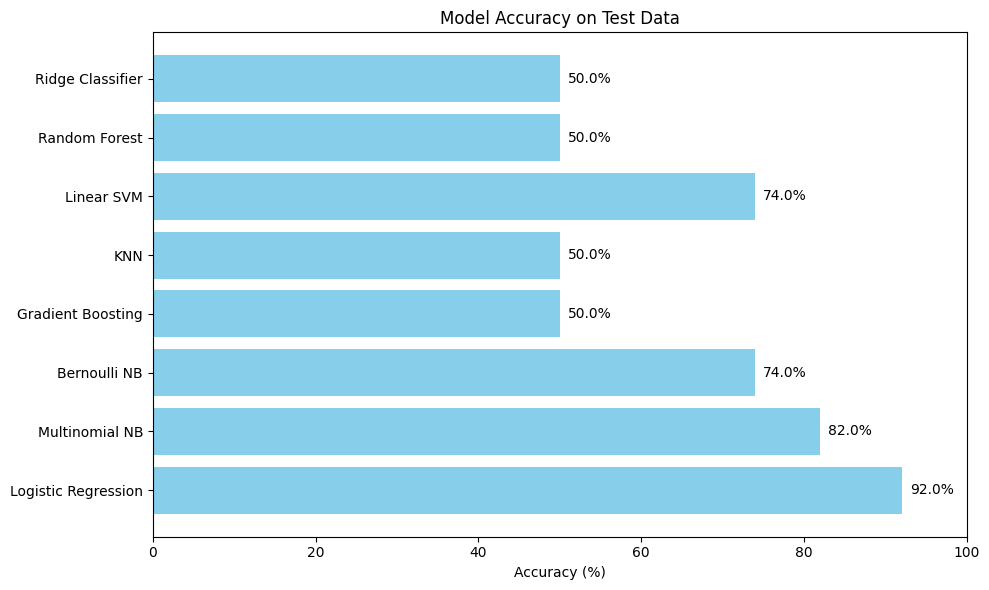

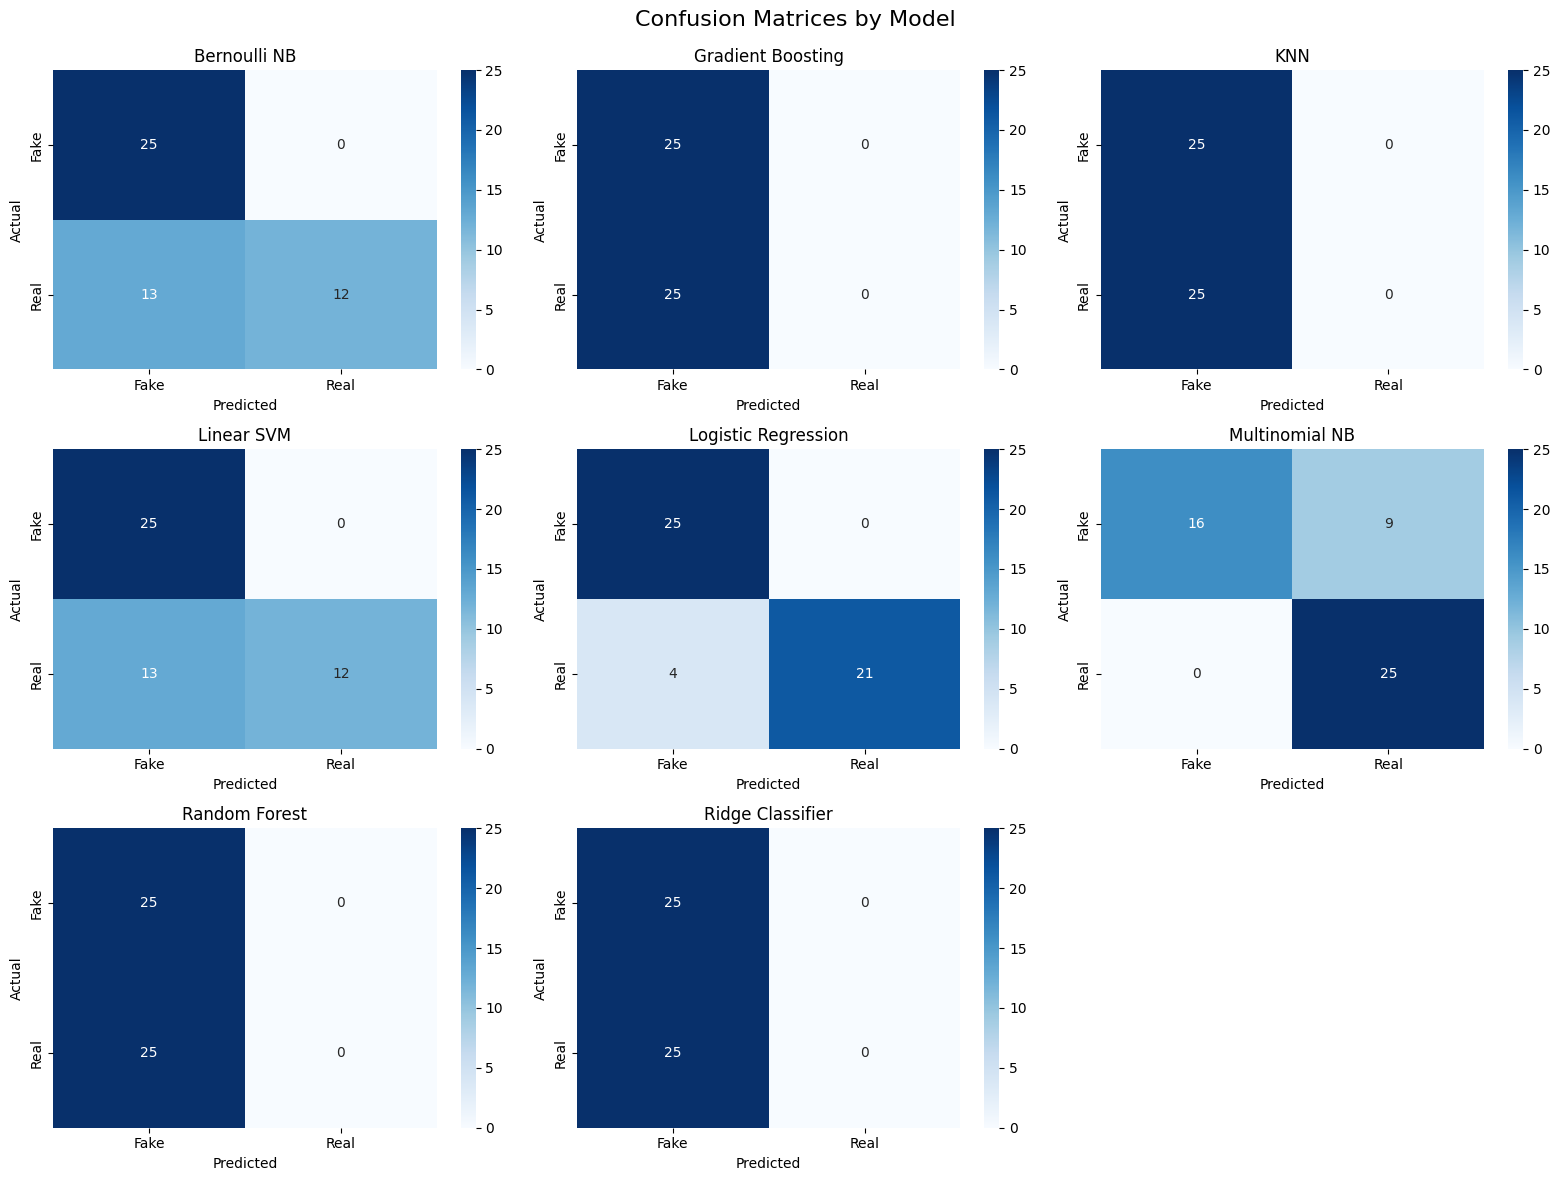

C:\Users\fahad.imdad\AppData\Local\Temp\ipykernel_8408\3803743155.py:124: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\fahad.imdad\Desktop\Projects\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


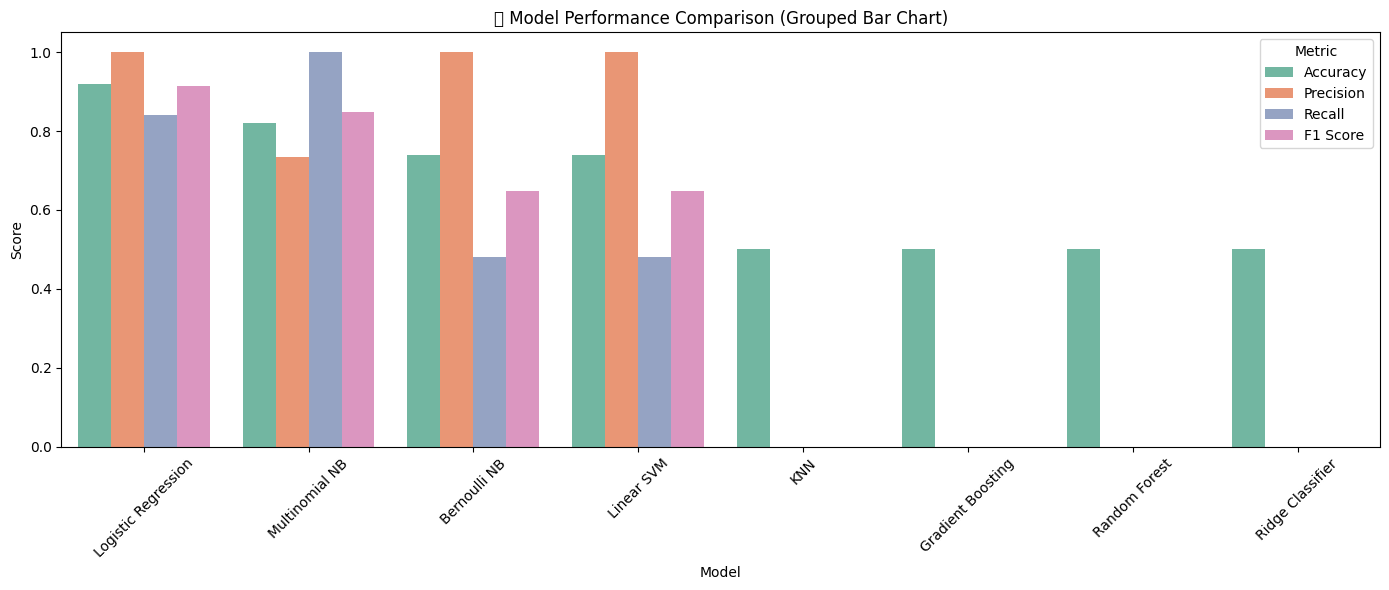

In [25]:
import json
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import defaultdict
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix
)

# Step 1: Load test data
with open("test_1.json", "r", encoding="utf-8") as f:
    test_data = json.load(f)

# Initialize tracking structures
model_correct = defaultdict(int)
model_total = defaultdict(int)
model_predictions = defaultdict(list)
true_labels = []

# Step 2: Collect predictions from API
for idx, item in enumerate(test_data, 1):
    payload = {"title": item["title"], "content": item["content"]} # data to send API
    label = item["label"]
    true_labels.append(label)

    try:
        response = requests.post("http://127.0.0.1:5000/predict", json=payload)
        predictions = response.json()["predictions"]
    except Exception as e:
        print(f"Error on sample {idx}: {e}")
        continue

    for model_name, pred in predictions.items():
        model_total[model_name] += 1
        if pred == label:
            model_correct[model_name] += 1
        model_predictions[model_name].append(pred)



# Step 3: Accuracy bar chart
accuracies = {
    model: round(correct / model_total[model] * 100, 2)
    for model, correct in model_correct.items()
}

plt.figure(figsize=(10, 6))
plt.barh(list(accuracies.keys()), list(accuracies.values()), color="skyblue")
plt.xlabel("Accuracy (%)")
plt.title("Model Accuracy on Test Data")
plt.xlim(0, 100)
for i, (model, acc) in enumerate(accuracies.items()):
    plt.text(acc + 1, i, f"{acc}%", va='center')
plt.tight_layout()
plt.show()



# Step 4: Confusion matrices for each model
n_models = len(model_predictions)
cols = 3
rows = (n_models + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(16, 4 * rows))
axes = axes.flatten()

for i, (model_name, preds) in enumerate(model_predictions.items()):
    cm = confusion_matrix(true_labels, preds)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[i],
                xticklabels=["Fake", "Real"], yticklabels=["Fake", "Real"])
    axes[i].set_title(f"{model_name}")
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")



# Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Confusion Matrices by Model", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()

# Step 5: Grouped bar chart for model metrics
model_names = [
    'Logistic Regression', 'Multinomial NB', 'Bernoulli NB',
    'Linear SVM', 'KNN', 'Gradient Boosting',
    'Random Forest', 'Ridge Classifier'
]

# Collect metrics (fill missing with 0s)
metrics_data = {
    'Model': [], 'Accuracy': [], 'Precision': [],
    'Recall': [], 'F1 Score': []
}

for model_name in model_names:
    preds = model_predictions.get(model_name)
    if preds is not None and len(preds) == len(true_labels):
        metrics_data['Model'].append(model_name)
        metrics_data['Accuracy'].append(accuracy_score(true_labels, preds))
        metrics_data['Precision'].append(precision_score(true_labels, preds, zero_division=0))
        metrics_data['Recall'].append(recall_score(true_labels, preds, zero_division=0))
        metrics_data['F1 Score'].append(f1_score(true_labels, preds, zero_division=0))
    else:
        metrics_data['Model'].append(model_name)
        metrics_data['Accuracy'].append(0.0)
        metrics_data['Precision'].append(0.0)
        metrics_data['Recall'].append(0.0)
        metrics_data['F1 Score'].append(0.0)

df_metrics = pd.DataFrame(metrics_data)
df_melted = df_metrics.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Plot grouped bar chart
plt.figure(figsize=(14, 6))
sns.barplot(data=df_melted, x='Model', y='Score', hue='Metric', palette="Set2")
plt.xticks(rotation=45)
plt.title("📊 Model Performance Comparison (Grouped Bar Chart)")
plt.ylim(0, 1.05)
plt.tight_layout()
plt.show()


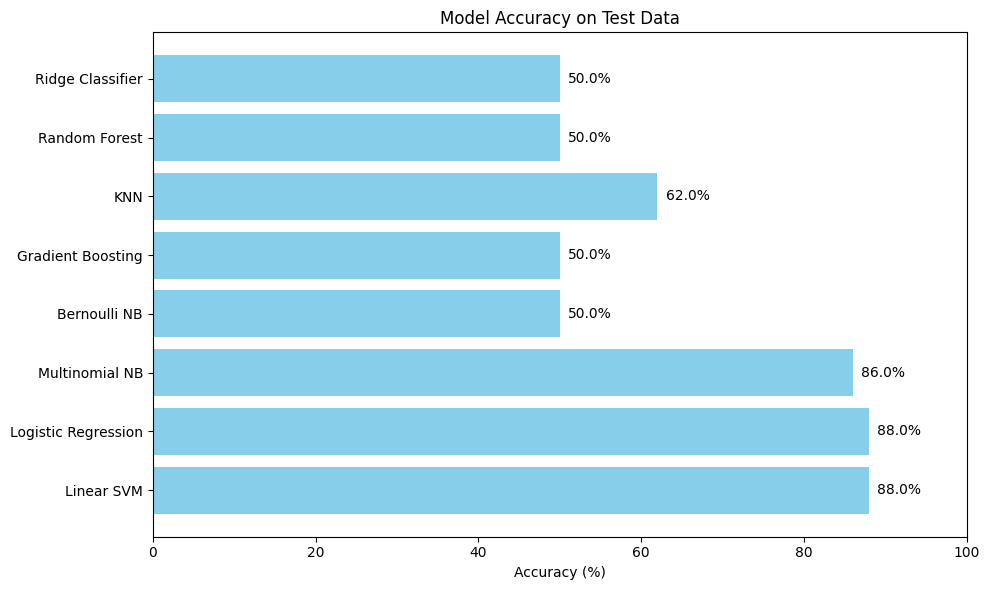

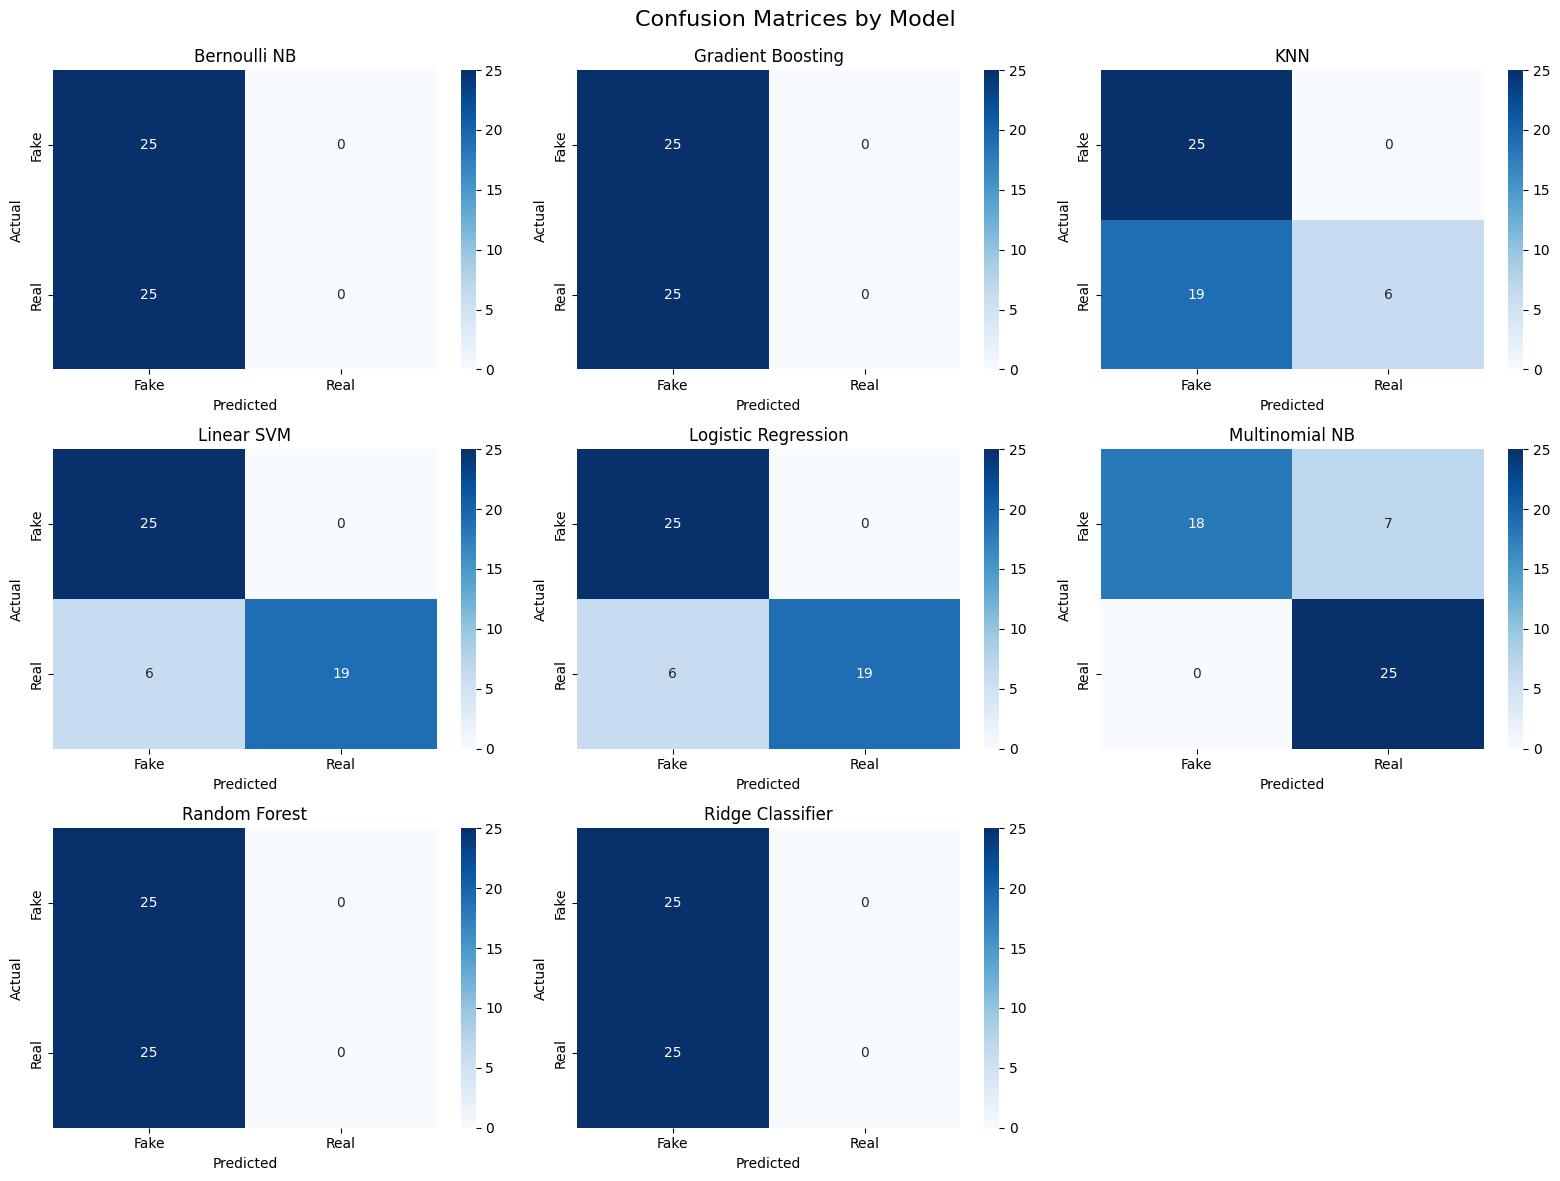

C:\Users\fahad.imdad\AppData\Local\Temp\ipykernel_8408\3902654743.py:118: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\fahad.imdad\Desktop\Projects\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


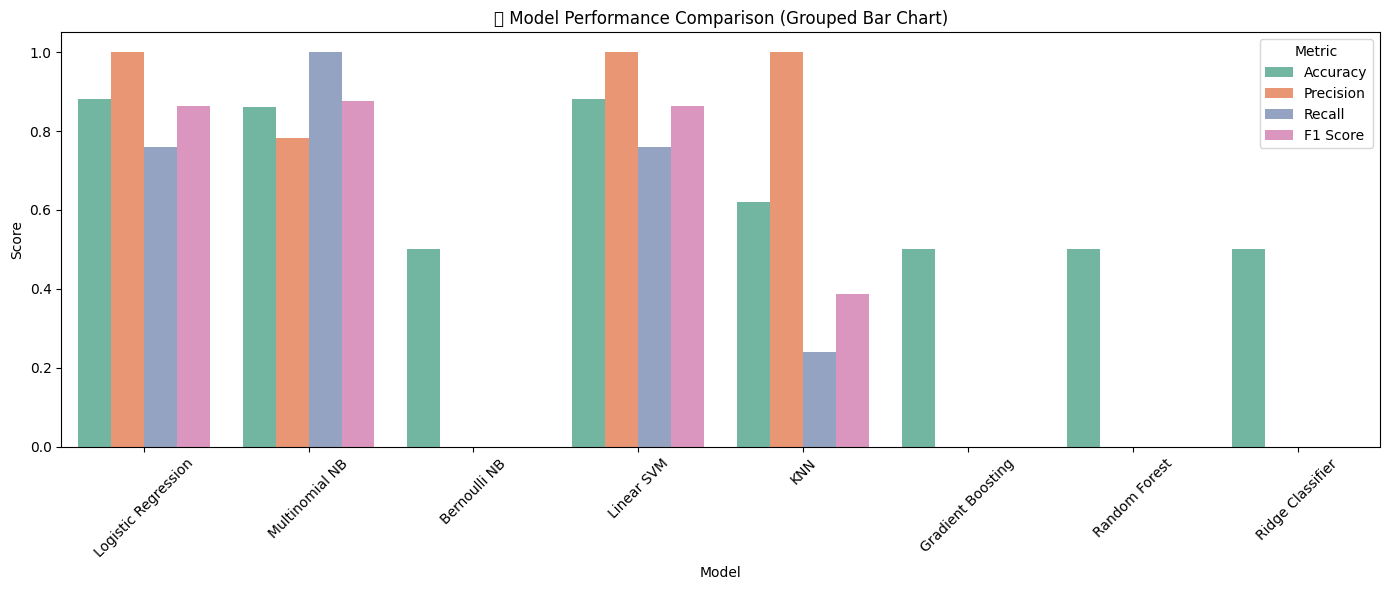

In [7]:
import json
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import defaultdict
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix
)

# Step 1: Load test data
with open("test_2.json", "r", encoding="utf-8") as f:
    test_data = json.load(f)

# Initialize tracking structures
model_correct = defaultdict(int)
model_total = defaultdict(int)
model_predictions = defaultdict(list)
true_labels = []

# Step 2: Collect predictions from API
for idx, item in enumerate(test_data, 1):
    payload = {"title": item["title"], "content": item["content"]}
    label = item["label"]
    true_labels.append(label)

    try:
        response = requests.post("http://127.0.0.1:5000/predict", json=payload)
        predictions = response.json()["predictions"]
    except Exception as e:
        print(f"Error on sample {idx}: {e}")
        continue

    for model_name, pred in predictions.items():
        model_total[model_name] += 1
        if pred == label:
            model_correct[model_name] += 1
        model_predictions[model_name].append(pred)

# Step 3: Accuracy bar chart
accuracies = {
    model: round(correct / model_total[model] * 100, 2)
    for model, correct in model_correct.items()
}

plt.figure(figsize=(10, 6))
plt.barh(list(accuracies.keys()), list(accuracies.values()), color="skyblue")
plt.xlabel("Accuracy (%)")
plt.title("Model Accuracy on Test Data")
plt.xlim(0, 100)
for i, (model, acc) in enumerate(accuracies.items()):
    plt.text(acc + 1, i, f"{acc}%", va='center')
plt.tight_layout()
plt.show()

# Step 4: Confusion matrices for each model
n_models = len(model_predictions)
cols = 3
rows = (n_models + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(16, 4 * rows))
axes = axes.flatten()

for i, (model_name, preds) in enumerate(model_predictions.items()):
    cm = confusion_matrix(true_labels, preds)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[i],
                xticklabels=["Fake", "Real"], yticklabels=["Fake", "Real"])
    axes[i].set_title(f"{model_name}")
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")

# Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Confusion Matrices by Model", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()

# Step 5: Grouped bar chart for model metrics
model_names = [
    'Logistic Regression', 'Multinomial NB', 'Bernoulli NB',
    'Linear SVM', 'KNN', 'Gradient Boosting',
    'Random Forest', 'Ridge Classifier'
]

# Collect metrics (fill missing with 0s)
metrics_data = {
    'Model': [], 'Accuracy': [], 'Precision': [],
    'Recall': [], 'F1 Score': []
}

for model_name in model_names:
    preds = model_predictions.get(model_name)
    if preds is not None and len(preds) == len(true_labels):
        metrics_data['Model'].append(model_name)
        metrics_data['Accuracy'].append(accuracy_score(true_labels, preds))
        metrics_data['Precision'].append(precision_score(true_labels, preds, zero_division=0))
        metrics_data['Recall'].append(recall_score(true_labels, preds, zero_division=0))
        metrics_data['F1 Score'].append(f1_score(true_labels, preds, zero_division=0))
    else:
        metrics_data['Model'].append(model_name)
        metrics_data['Accuracy'].append(0.0)
        metrics_data['Precision'].append(0.0)
        metrics_data['Recall'].append(0.0)
        metrics_data['F1 Score'].append(0.0)

df_metrics = pd.DataFrame(metrics_data)
df_melted = df_metrics.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Plot grouped bar chart
plt.figure(figsize=(14, 6))
sns.barplot(data=df_melted, x='Model', y='Score', hue='Metric', palette="Set2")
plt.xticks(rotation=45)
plt.title("📊 Model Performance Comparison (Grouped Bar Chart)")
plt.ylim(0, 1.05)
plt.tight_layout()
plt.show()


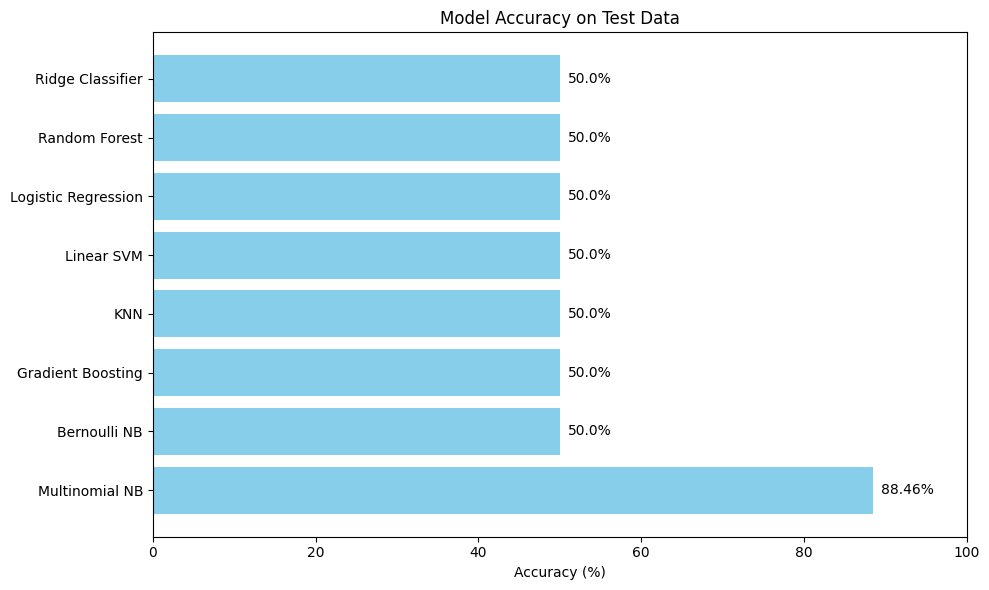

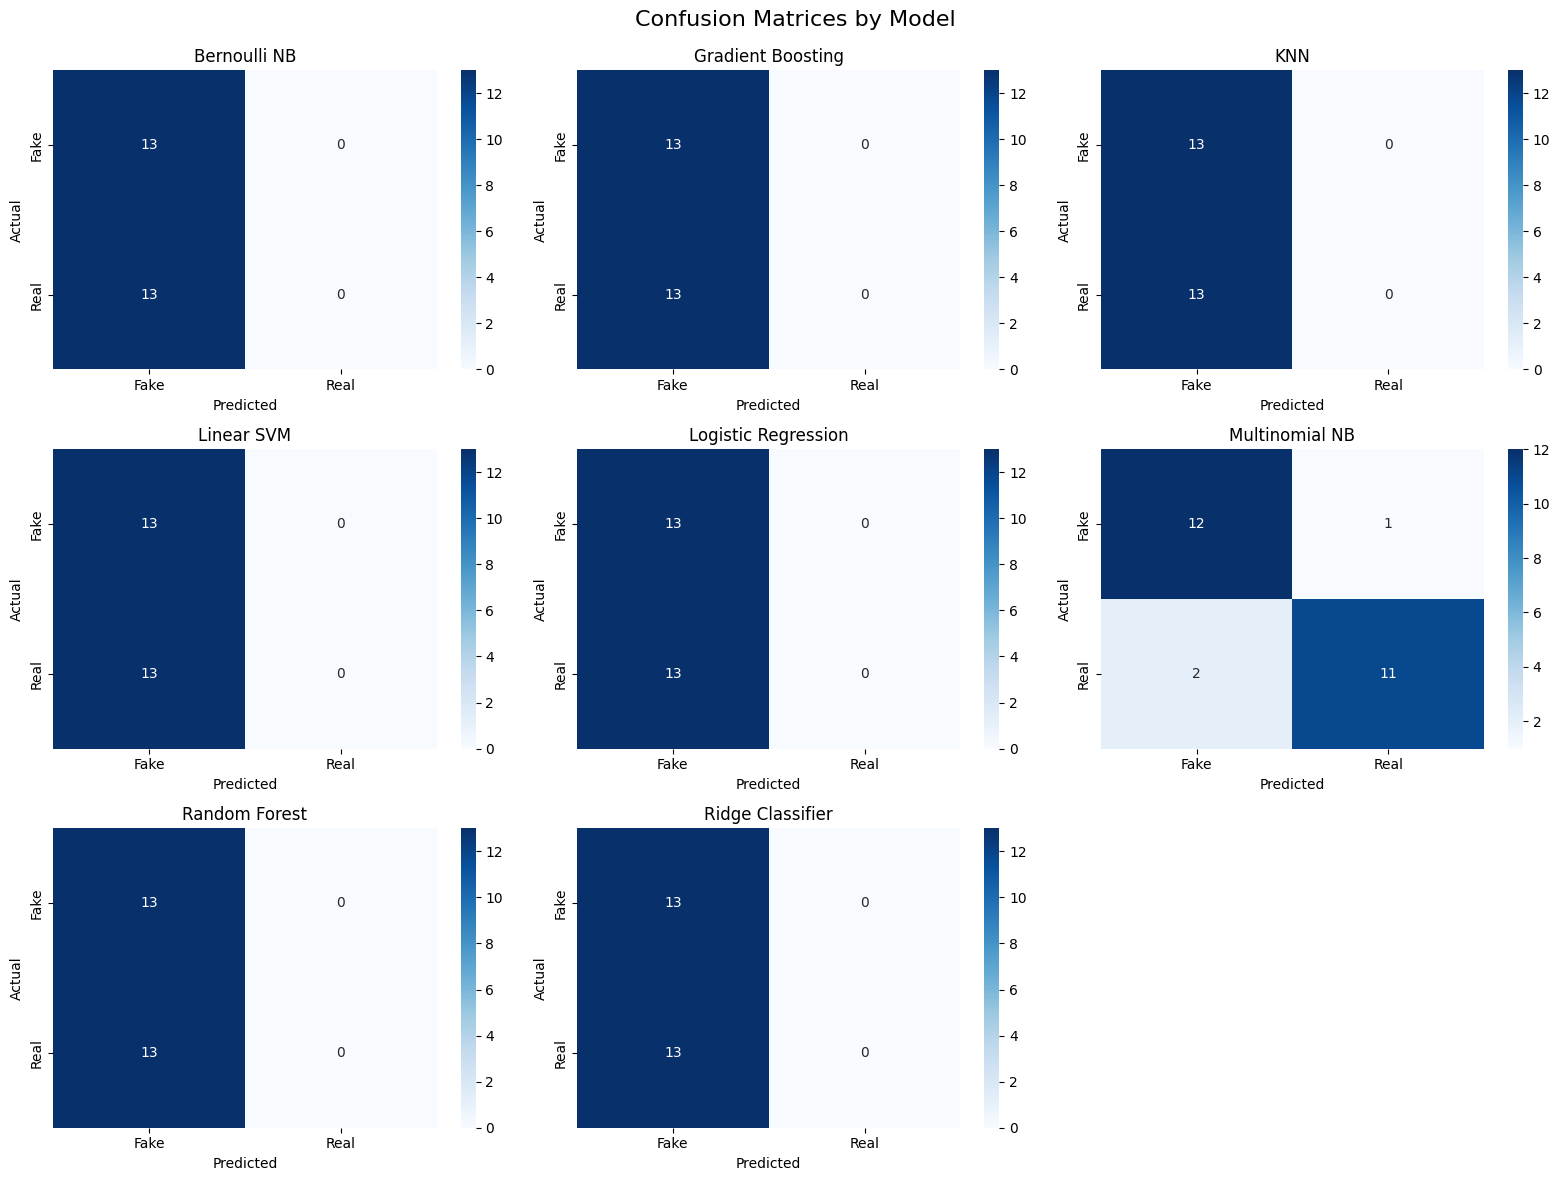

C:\Users\fahad.imdad\AppData\Local\Temp\ipykernel_8408\1612256232.py:118: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\fahad.imdad\Desktop\Projects\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


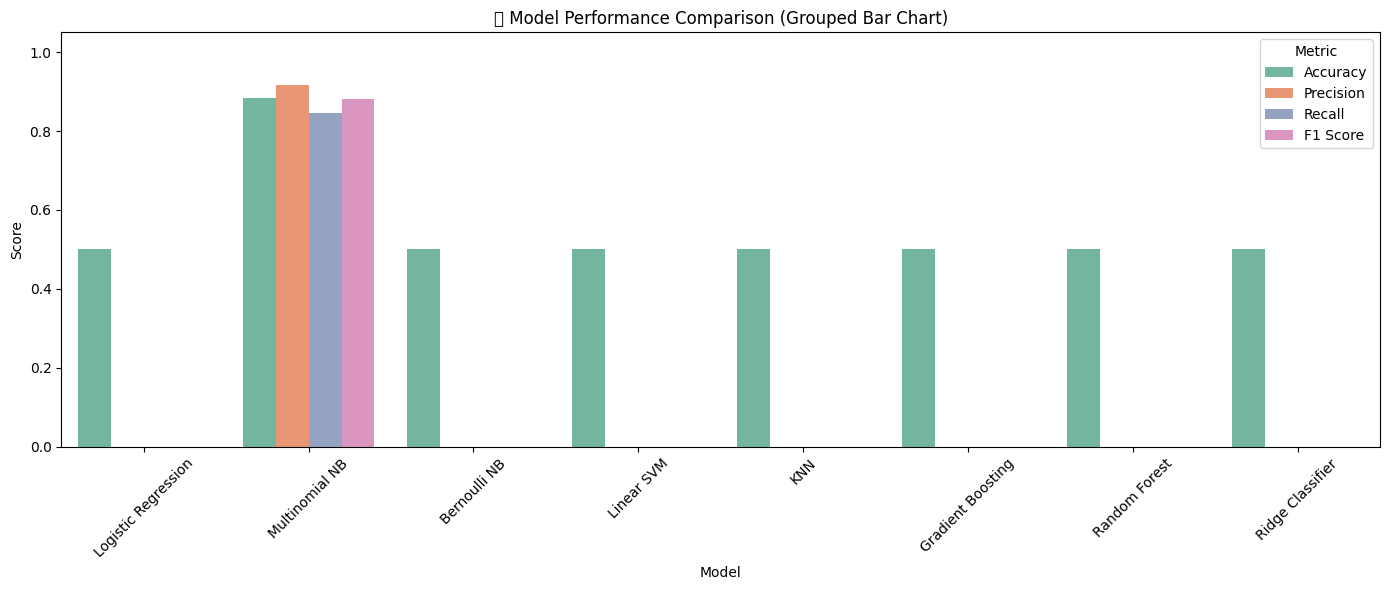

In [14]:
import json
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import defaultdict
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix
)

# Step 1: Load test data
with open("test_3.json", "r", encoding="utf-8") as f:
    test_data = json.load(f)

# Initialize tracking structures
model_correct = defaultdict(int)
model_total = defaultdict(int)
model_predictions = defaultdict(list)
true_labels = []

# Step 2: Collect predictions from API
for idx, item in enumerate(test_data, 1):
    payload = {"title": item["title"], "content": item["content"]}
    label = item["label"]
    true_labels.append(label)

    try:
        response = requests.post("http://127.0.0.1:5000/predict", json=payload)
        predictions = response.json()["predictions"]
    except Exception as e:
        print(f"Error on sample {idx}: {e}")
        continue

    for model_name, pred in predictions.items():
        model_total[model_name] += 1
        if pred == label:
            model_correct[model_name] += 1
        model_predictions[model_name].append(pred)

# Step 3: Accuracy bar chart
accuracies = {
    model: round(correct / model_total[model] * 100, 2)
    for model, correct in model_correct.items()
}

plt.figure(figsize=(10, 6))
plt.barh(list(accuracies.keys()), list(accuracies.values()), color="skyblue")
plt.xlabel("Accuracy (%)")
plt.title("Model Accuracy on Test Data")
plt.xlim(0, 100)
for i, (model, acc) in enumerate(accuracies.items()):
    plt.text(acc + 1, i, f"{acc}%", va='center')
plt.tight_layout()
plt.show()

# Step 4: Confusion matrices for each model
n_models = len(model_predictions)
cols = 3
rows = (n_models + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(16, 4 * rows))
axes = axes.flatten()

for i, (model_name, preds) in enumerate(model_predictions.items()):
    cm = confusion_matrix(true_labels, preds)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[i],
                xticklabels=["Fake", "Real"], yticklabels=["Fake", "Real"])
    axes[i].set_title(f"{model_name}")
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")

# Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Confusion Matrices by Model", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()

# Step 5: Grouped bar chart for model metrics
model_names = [
    'Logistic Regression', 'Multinomial NB', 'Bernoulli NB',
    'Linear SVM', 'KNN', 'Gradient Boosting',
    'Random Forest', 'Ridge Classifier'
]

# Collect metrics (fill missing with 0s)
metrics_data = {
    'Model': [], 'Accuracy': [], 'Precision': [],
    'Recall': [], 'F1 Score': []
}

for model_name in model_names:
    preds = model_predictions.get(model_name)
    if preds is not None and len(preds) == len(true_labels):
        metrics_data['Model'].append(model_name)
        metrics_data['Accuracy'].append(accuracy_score(true_labels, preds))
        metrics_data['Precision'].append(precision_score(true_labels, preds, zero_division=0))
        metrics_data['Recall'].append(recall_score(true_labels, preds, zero_division=0))
        metrics_data['F1 Score'].append(f1_score(true_labels, preds, zero_division=0))
    else:
        metrics_data['Model'].append(model_name)
        metrics_data['Accuracy'].append(0.0)
        metrics_data['Precision'].append(0.0)
        metrics_data['Recall'].append(0.0)
        metrics_data['F1 Score'].append(0.0)

df_metrics = pd.DataFrame(metrics_data)
df_melted = df_metrics.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Plot grouped bar chart
plt.figure(figsize=(14, 6))
sns.barplot(data=df_melted, x='Model', y='Score', hue='Metric', palette="Set2")
plt.xticks(rotation=45)
plt.title("📊 Model Performance Comparison (Grouped Bar Chart)")
plt.ylim(0, 1.05)
plt.tight_layout()
plt.show()


C:\Users\fahad.imdad\AppData\Local\Temp\ipykernel_8408\862846907.py:64: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\fahad.imdad\Desktop\Projects\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


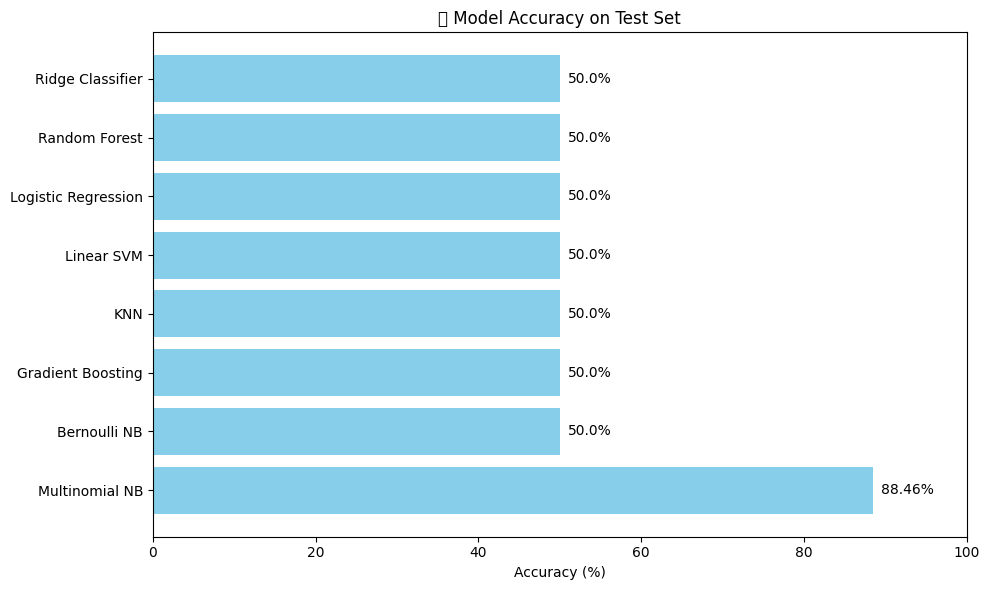

C:\Users\fahad.imdad\AppData\Local\Temp\ipykernel_8408\862846907.py:86: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\fahad.imdad\Desktop\Projects\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


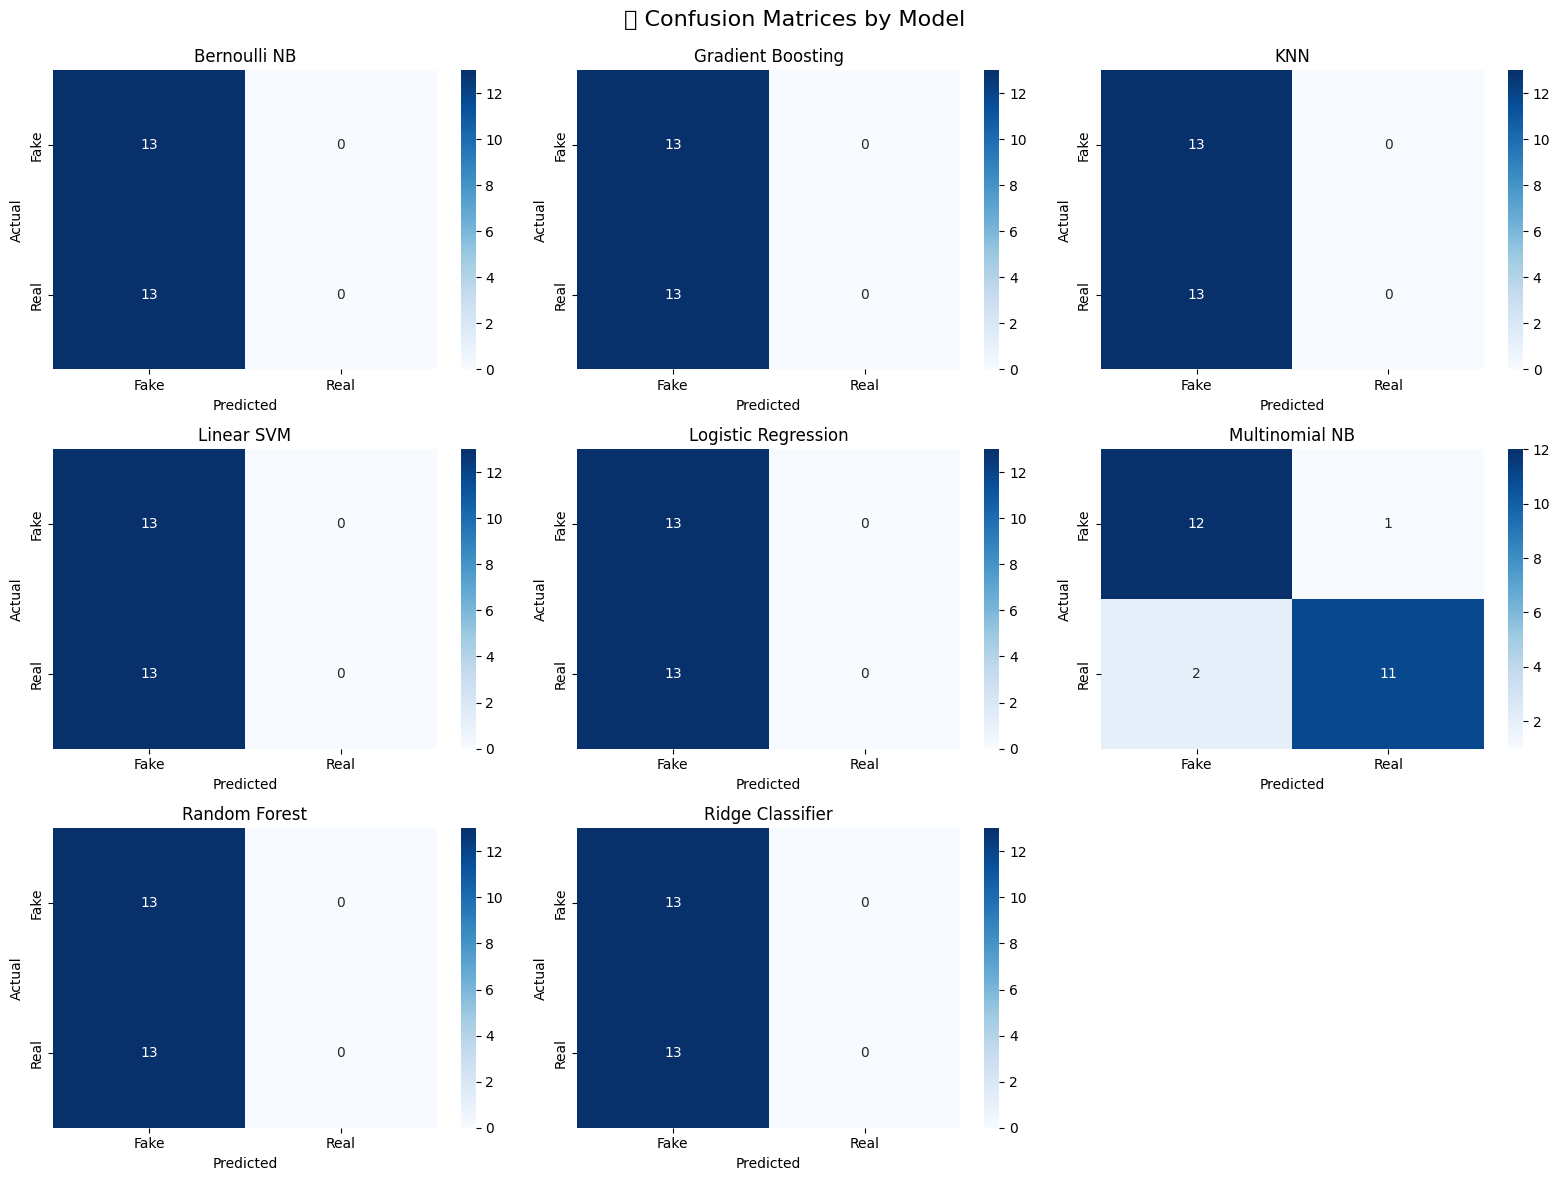

C:\Users\fahad.imdad\AppData\Local\Temp\ipykernel_8408\862846907.py:125: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\fahad.imdad\Desktop\Projects\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


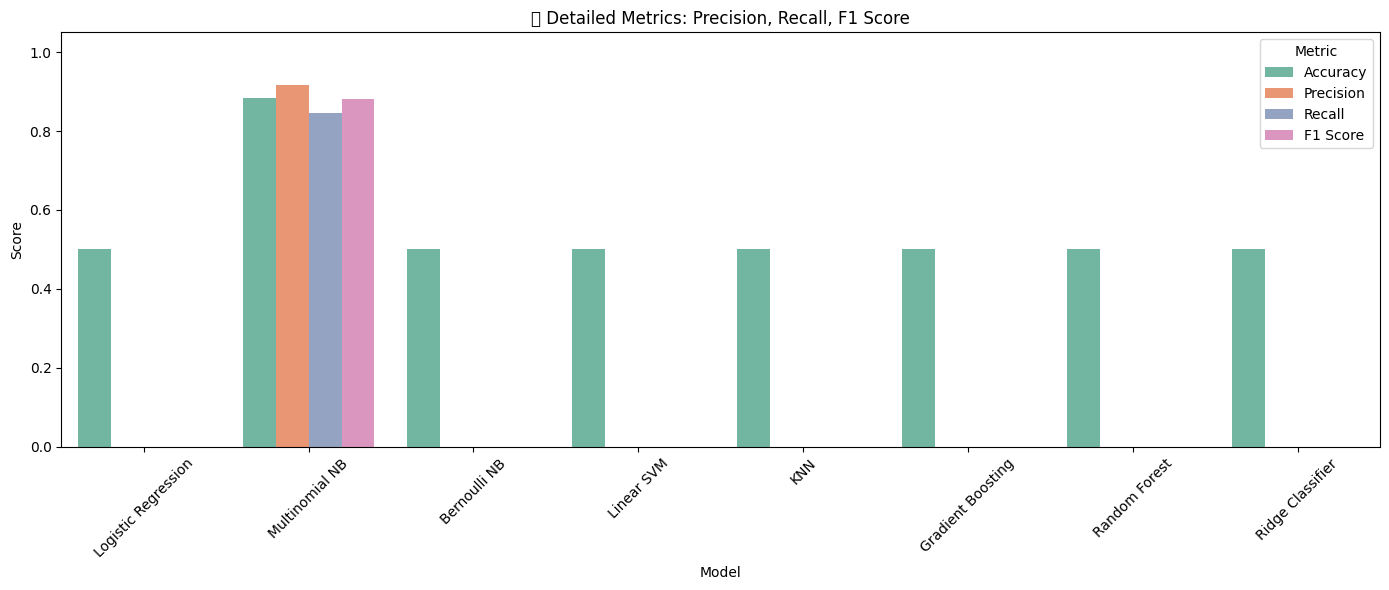

In [23]:
import json
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re
from collections import defaultdict
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix
)

# Clean text (if model was trained on cleaned input)
def clean_text(text):
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    text = re.sub(r"\s+", " ", text)
    return text.strip().lower()

# Load test data
with open("test_3.json", "r", encoding="utf-8") as f:
    test_data = json.load(f)

model_correct = defaultdict(int)
model_total = defaultdict(int)
model_predictions = defaultdict(list)
true_labels = []

# Send data to API
for idx, item in enumerate(test_data, 1):
    label = item["label"]
    true_labels.append(label)

    # Combine and clean input
    combined = clean_text(f"{item['title']} {item['content']}")
    payload = {"title": "", "content": combined}

    try:
        response = requests.post("http://127.0.0.1:5000/predict", json=payload)
        predictions = response.json()["predictions"]
    except Exception as e:
        print(f"Error on sample {idx}: {e}")
        continue

    for model_name, pred in predictions.items():
        model_total[model_name] += 1
        if pred == label:
            model_correct[model_name] += 1
        model_predictions[model_name].append(pred)

# Accuracy bar chart
accuracies = {
    model: round(correct / model_total[model] * 100, 2)
    for model, correct in model_correct.items()
}

plt.figure(figsize=(10, 6))
plt.barh(list(accuracies.keys()), list(accuracies.values()), color="skyblue")
plt.xlabel("Accuracy (%)")
plt.title("✅ Model Accuracy on Test Set")
plt.xlim(0, 100)
for i, (model, acc) in enumerate(accuracies.items()):
    plt.text(acc + 1, i, f"{acc}%", va='center')
plt.tight_layout()
plt.show()

# Confusion matrices
n_models = len(model_predictions)
cols = 3
rows = (n_models + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(16, 4 * rows))
axes = axes.flatten()

for i, (model_name, preds) in enumerate(model_predictions.items()):
    cm = confusion_matrix(true_labels, preds)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[i],
                xticklabels=["Fake", "Real"], yticklabels=["Fake", "Real"])
    axes[i].set_title(f"{model_name}")
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("📊 Confusion Matrices by Model", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()

# Metrics: accuracy, precision, recall, F1
model_names = [
    'Logistic Regression', 'Multinomial NB', 'Bernoulli NB',
    'Linear SVM', 'KNN', 'Gradient Boosting',
    'Random Forest', 'Ridge Classifier'
]

metrics_data = {
    'Model': [], 'Accuracy': [], 'Precision': [],
    'Recall': [], 'F1 Score': []
}

for model_name in model_names:
    preds = model_predictions.get(model_name)
    if preds is not None and len(preds) == len(true_labels):
        metrics_data['Model'].append(model_name)
        metrics_data['Accuracy'].append(accuracy_score(true_labels, preds))
        metrics_data['Precision'].append(precision_score(true_labels, preds, zero_division=0))
        metrics_data['Recall'].append(recall_score(true_labels, preds, zero_division=0))
        metrics_data['F1 Score'].append(f1_score(true_labels, preds, zero_division=0))
    else:
        metrics_data['Model'].append(model_name)
        metrics_data['Accuracy'].append(0.0)
        metrics_data['Precision'].append(0.0)
        metrics_data['Recall'].append(0.0)
        metrics_data['F1 Score'].append(0.0)

df_metrics = pd.DataFrame(metrics_data)
df_melted = df_metrics.melt(id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(14, 6))
sns.barplot(data=df_melted, x='Model', y='Score', hue='Metric', palette="Set2")
plt.xticks(rotation=45)
plt.title("📈 Detailed Metrics: Precision, Recall, F1 Score")
plt.ylim(0, 1.05)
plt.tight_layout()
plt.show()


C:\Users\fahad.imdad\AppData\Local\Temp\ipykernel_8408\2427803374.py:64: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\fahad.imdad\Desktop\Projects\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


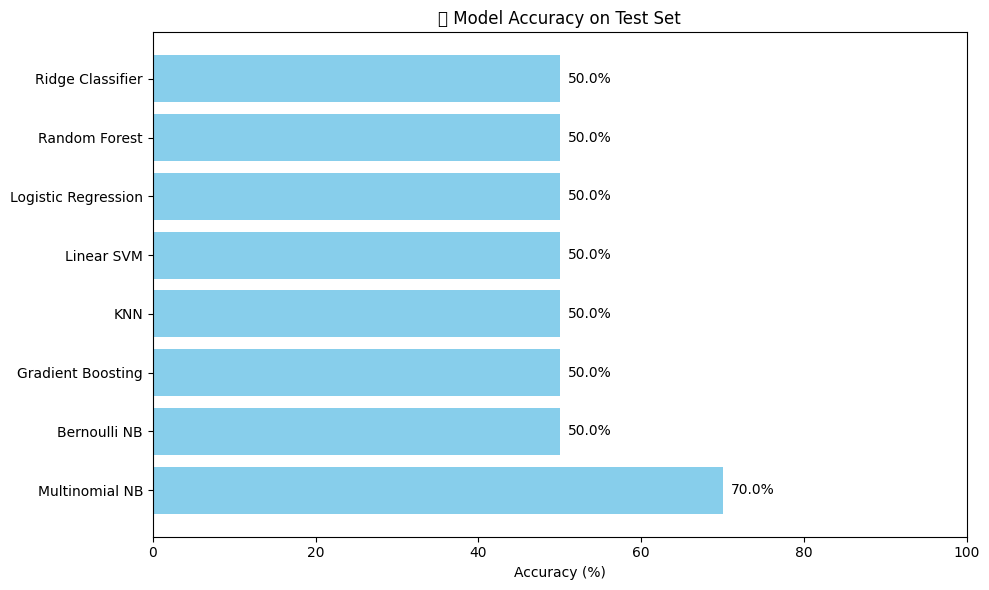

C:\Users\fahad.imdad\AppData\Local\Temp\ipykernel_8408\2427803374.py:86: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\fahad.imdad\Desktop\Projects\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


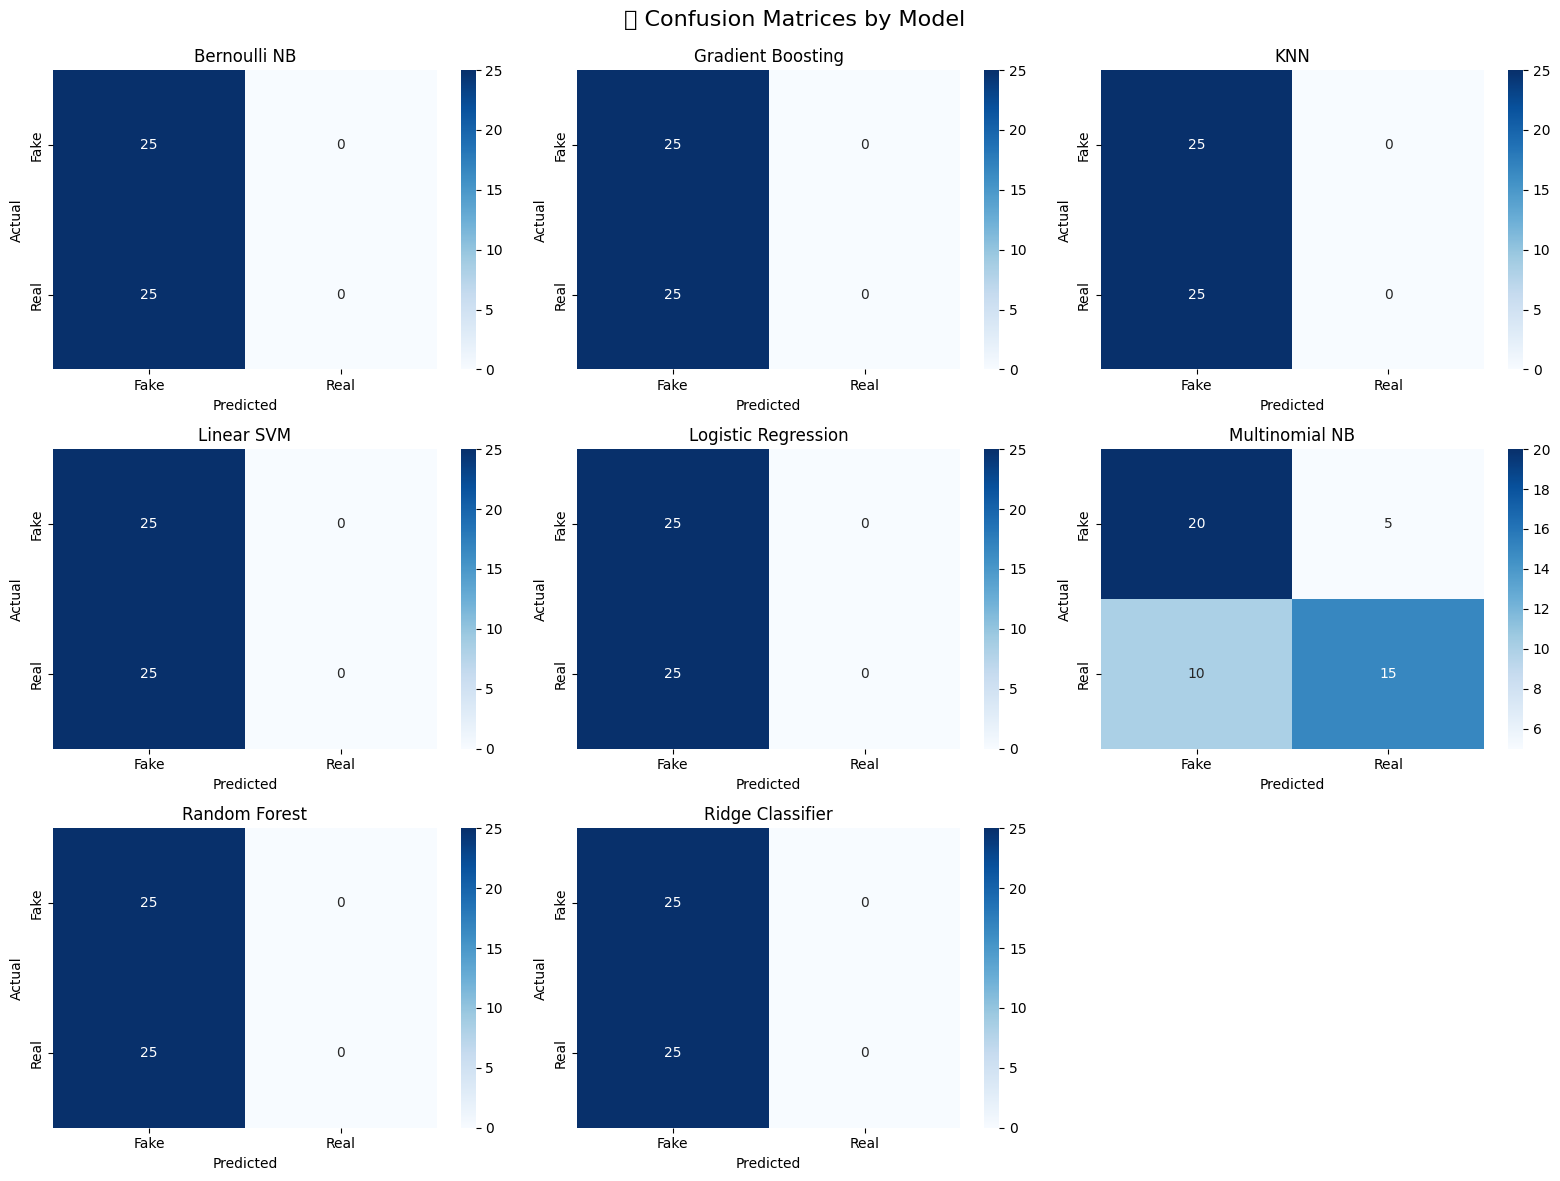

C:\Users\fahad.imdad\AppData\Local\Temp\ipykernel_8408\2427803374.py:125: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\fahad.imdad\Desktop\Projects\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


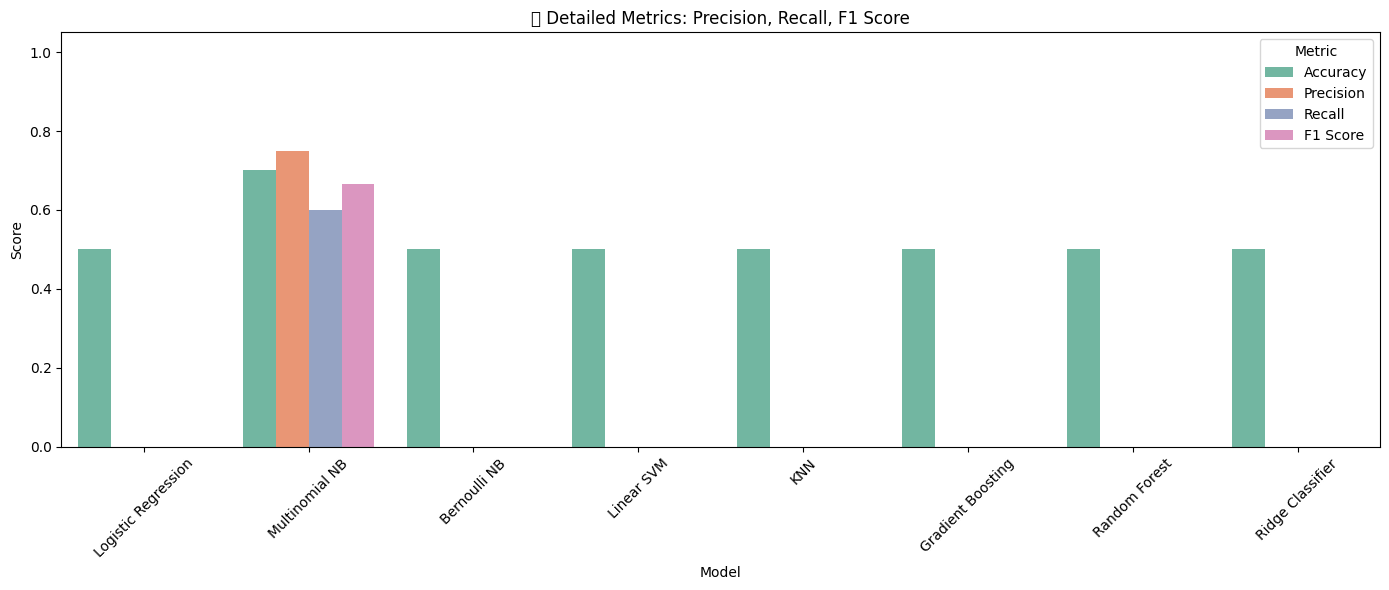

In [27]:
import json
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re
from collections import defaultdict
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix
)

# Clean text (if model was trained on cleaned input)
def clean_text(text):
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    text = re.sub(r"\s+", " ", text)
    return text.strip().lower()

# Load test data
with open("test_4.json", "r", encoding="utf-8") as f:
    test_data = json.load(f)

model_correct = defaultdict(int)
model_total = defaultdict(int)
model_predictions = defaultdict(list)
true_labels = []

# Send data to API
for idx, item in enumerate(test_data, 1):
    label = item["label"]
    true_labels.append(label)

    # Combine and clean input
    combined = clean_text(f"{item['title']} {item['content']}")
    payload = {"title": item["title"], "content": item["content"]}

    try:
        response = requests.post("http://127.0.0.1:5000/predict", json=payload)
        predictions = response.json()["predictions"]
    except Exception as e:
        print(f"Error on sample {idx}: {e}")
        continue

    for model_name, pred in predictions.items():
        model_total[model_name] += 1
        if pred == label:
            model_correct[model_name] += 1
        model_predictions[model_name].append(pred)

# Accuracy bar chart
accuracies = {
    model: round(correct / model_total[model] * 100, 2)
    for model, correct in model_correct.items()
}

plt.figure(figsize=(10, 6))
plt.barh(list(accuracies.keys()), list(accuracies.values()), color="skyblue")
plt.xlabel("Accuracy (%)")
plt.title("✅ Model Accuracy on Test Set")
plt.xlim(0, 100)
for i, (model, acc) in enumerate(accuracies.items()):
    plt.text(acc + 1, i, f"{acc}%", va='center')
plt.tight_layout()
plt.show()

# Confusion matrices
n_models = len(model_predictions)
cols = 3
rows = (n_models + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(16, 4 * rows))
axes = axes.flatten()

for i, (model_name, preds) in enumerate(model_predictions.items()):
    cm = confusion_matrix(true_labels, preds)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[i],
                xticklabels=["Fake", "Real"], yticklabels=["Fake", "Real"])
    axes[i].set_title(f"{model_name}")
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("📊 Confusion Matrices by Model", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()

# Metrics: accuracy, precision, recall, F1
model_names = [
    'Logistic Regression', 'Multinomial NB', 'Bernoulli NB',
    'Linear SVM', 'KNN', 'Gradient Boosting',
    'Random Forest', 'Ridge Classifier'
]

metrics_data = {
    'Model': [], 'Accuracy': [], 'Precision': [],
    'Recall': [], 'F1 Score': []
}

for model_name in model_names:
    preds = model_predictions.get(model_name)
    if preds is not None and len(preds) == len(true_labels):
        metrics_data['Model'].append(model_name)
        metrics_data['Accuracy'].append(accuracy_score(true_labels, preds))
        metrics_data['Precision'].append(precision_score(true_labels, preds, zero_division=0))
        metrics_data['Recall'].append(recall_score(true_labels, preds, zero_division=0))
        metrics_data['F1 Score'].append(f1_score(true_labels, preds, zero_division=0))
    else:
        metrics_data['Model'].append(model_name)
        metrics_data['Accuracy'].append(0.0)
        metrics_data['Precision'].append(0.0)
        metrics_data['Recall'].append(0.0)
        metrics_data['F1 Score'].append(0.0)

df_metrics = pd.DataFrame(metrics_data)
df_melted = df_metrics.melt(id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(14, 6))
sns.barplot(data=df_melted, x='Model', y='Score', hue='Metric', palette="Set2")
plt.xticks(rotation=45)
plt.title("📈 Detailed Metrics: Precision, Recall, F1 Score")
plt.ylim(0, 1.05)
plt.tight_layout()
plt.show()


❌ Error on sample 1: 'predictions'
❌ Error on sample 2: 'predictions'
❌ Error on sample 3: 'predictions'
❌ Error on sample 4: 'predictions'
❌ Error on sample 5: 'predictions'
❌ Error on sample 6: 'predictions'
❌ Error on sample 7: 'predictions'
❌ Error on sample 8: 'predictions'
❌ Error on sample 9: 'predictions'
❌ Error on sample 10: 'predictions'
❌ Error on sample 11: 'predictions'
❌ Error on sample 12: 'predictions'
❌ Error on sample 13: 'predictions'
❌ Error on sample 14: 'predictions'
❌ Error on sample 15: 'predictions'
❌ Error on sample 16: 'predictions'
❌ Error on sample 17: 'predictions'
❌ Error on sample 18: 'predictions'
❌ Error on sample 19: 'predictions'
❌ Error on sample 20: 'predictions'
❌ Error on sample 21: 'predictions'
❌ Error on sample 22: 'predictions'
❌ Error on sample 23: 'predictions'
❌ Error on sample 24: 'predictions'
❌ Error on sample 25: 'predictions'
❌ Error on sample 26: 'predictions'


C:\Users\fahad.imdad\AppData\Local\Temp\ipykernel_8408\1172626756.py:56: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


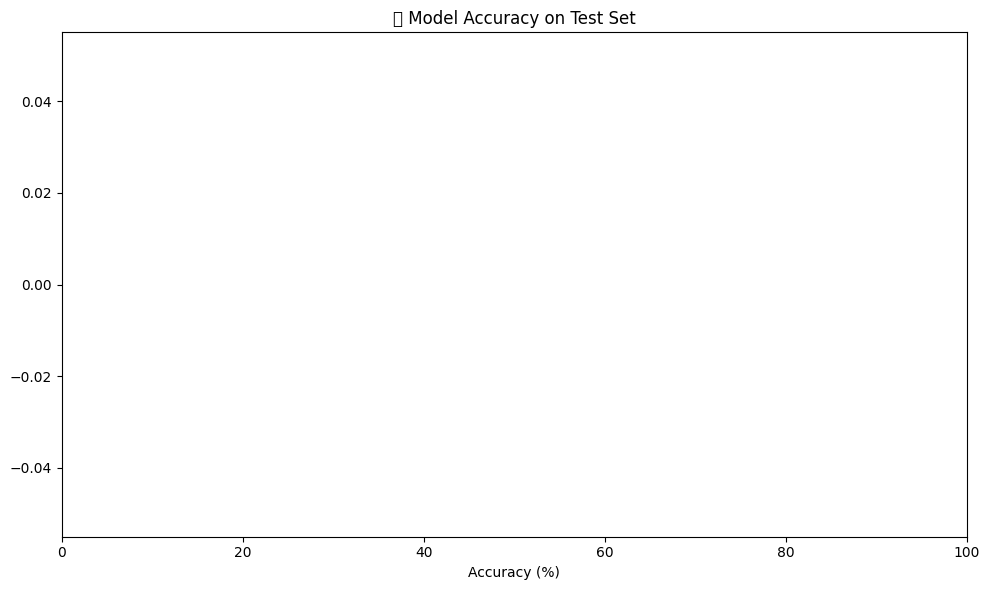

ValueError: Number of rows must be a positive integer, not 0

<Figure size 1600x0 with 0 Axes>

In [20]:
import json
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import defaultdict
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix
)

# Step 1: Load test data
with open("test_3.json", "r", encoding="utf-8") as f:
    test_data = json.load(f)

# Initialize tracking structures
model_correct = defaultdict(int)
model_total = defaultdict(int)
model_predictions = defaultdict(list)
true_labels = []

# Step 2: Send predictions to API
for idx, item in enumerate(test_data, 1):
    # 👇 Combine title and content
    full_text = f"{item['title']} {item['content']}"
    payload = {"text": full_text}  # Ensure this matches API input schema
    label = item["label"]
    true_labels.append(label)

    try:
        response = requests.post("http://127.0.0.1:5000/predict", json=payload)
        predictions = response.json()["predictions"]
    except Exception as e:
        print(f"❌ Error on sample {idx}: {e}")
        continue

    for model_name, pred in predictions.items():
        model_total[model_name] += 1
        if pred == label:
            model_correct[model_name] += 1
        model_predictions[model_name].append(pred)

# Step 3: Accuracy bar chart
accuracies = {
    model: round(correct / model_total[model] * 100, 2)
    for model, correct in model_correct.items()
}

plt.figure(figsize=(10, 6))
plt.barh(list(accuracies.keys()), list(accuracies.values()), color="skyblue")
plt.xlabel("Accuracy (%)")
plt.title("📊 Model Accuracy on Test Set")
plt.xlim(0, 100)
for i, (model, acc) in enumerate(accuracies.items()):
    plt.text(acc + 1, i, f"{acc}%", va='center')
plt.tight_layout()
plt.show()

# Step 4: Confusion matrices
n_models = len(model_predictions)
cols = 3
rows = (n_models + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(16, 4 * rows))
axes = axes.flatten()

for i, (model_name, preds) in enumerate(model_predictions.items()):
    cm = confusion_matrix(true_labels, preds)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[i],
                xticklabels=["Fake", "Real"], yticklabels=["Fake", "Real"])
    axes[i].set_title(model_name)
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")

# Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("🧾 Confusion Matrices by Model", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()

# Step 5: Metrics bar chart
model_names = [
    'Logistic Regression', 'Multinomial NB', 'Bernoulli NB',
    'Linear SVM', 'KNN', 'Gradient Boosting',
    'Random Forest', 'Ridge Classifier'
]

metrics_data = {
    'Model': [], 'Accuracy': [], 'Precision': [],
    'Recall': [], 'F1 Score': []
}

for model_name in model_names:
    preds = model_predictions.get(model_name)
    if preds and len(preds) == len(true_labels):
        metrics_data['Model'].append(model_name)
        metrics_data['Accuracy'].append(accuracy_score(true_labels, preds))
        metrics_data['Precision'].append(precision_score(true_labels, preds, zero_division=0))
        metrics_data['Recall'].append(recall_score(true_labels, preds, zero_division=0))
        metrics_data['F1 Score'].append(f1_score(true_labels, preds, zero_division=0))
    else:
        metrics_data['Model'].append(model_name)
        metrics_data['Accuracy'].append(0.0)
        metrics_data['Precision'].append(0.0)
        metrics_data['Recall'].append(0.0)
        metrics_data['F1 Score'].append(0.0)

df_metrics = pd.DataFrame(metrics_data)
df_melted = df_metrics.melt(id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(14, 6))
sns.barplot(data=df_melted, x='Model', y='Score', hue='Metric', palette="Set2")
plt.xticks(rotation=45)
plt.title("📊 Model Performance Metrics")
plt.ylim(0, 1.05)
plt.tight_layout()
plt.show()


In [22]:
import requests

payload = {
    "title": "Breaking News: Moon Base Announced",
    "content": "NASA has announced a new mission to establish a permanent base on the Moon by 2030."
}
response = requests.post("http://127.0.0.1:5000/predict", json=payload)
print(response.status_code)
print(response.json())


200
{'predictions': {'Bernoulli NB': 0, 'Gradient Boosting': 0, 'KNN': 0, 'Linear SVM': 0, 'Logistic Regression': 0, 'Multinomial NB': 1, 'Random Forest': 0, 'Ridge Classifier': 0}, 'title': 'Breaking News: Moon Base Announced'}


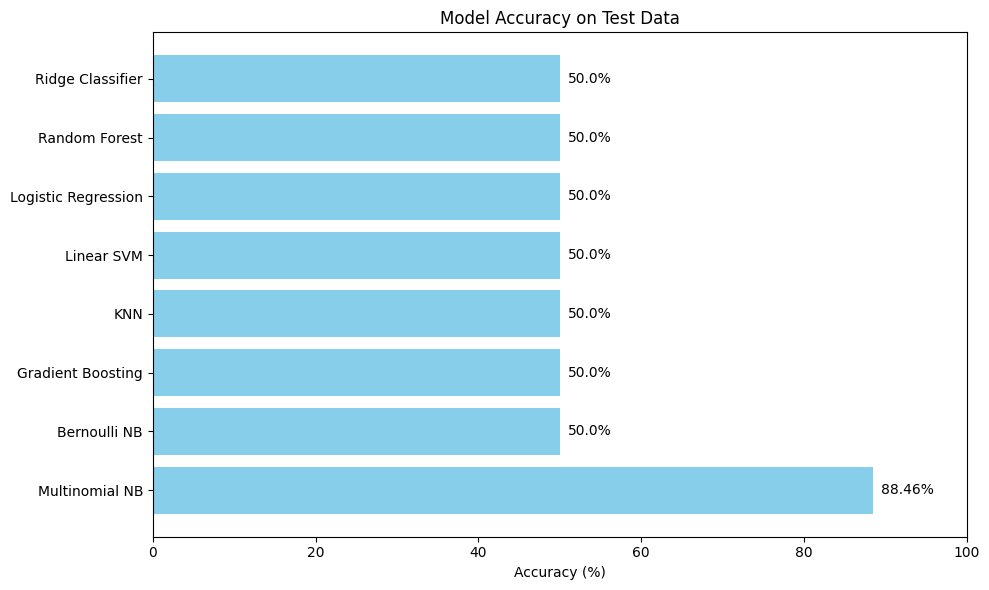

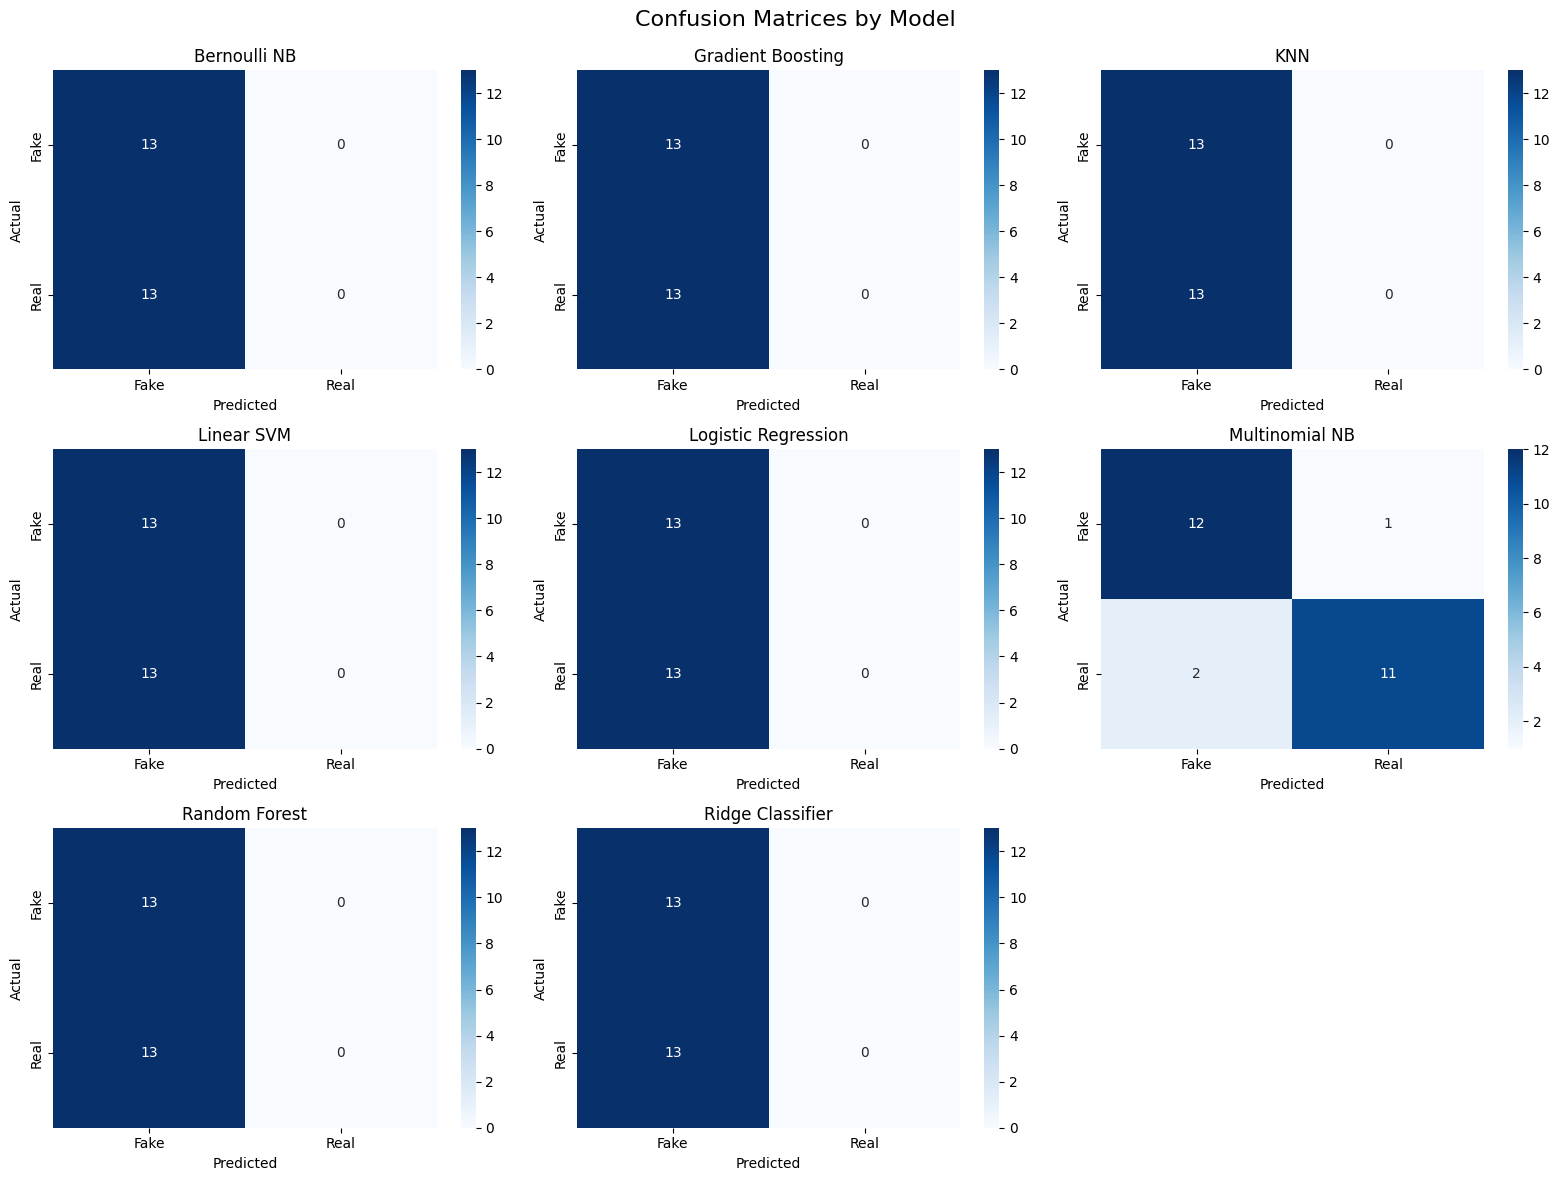

C:\Users\fahad.imdad\AppData\Local\Temp\ipykernel_8408\1068815844.py:134: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\fahad.imdad\Desktop\Projects\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


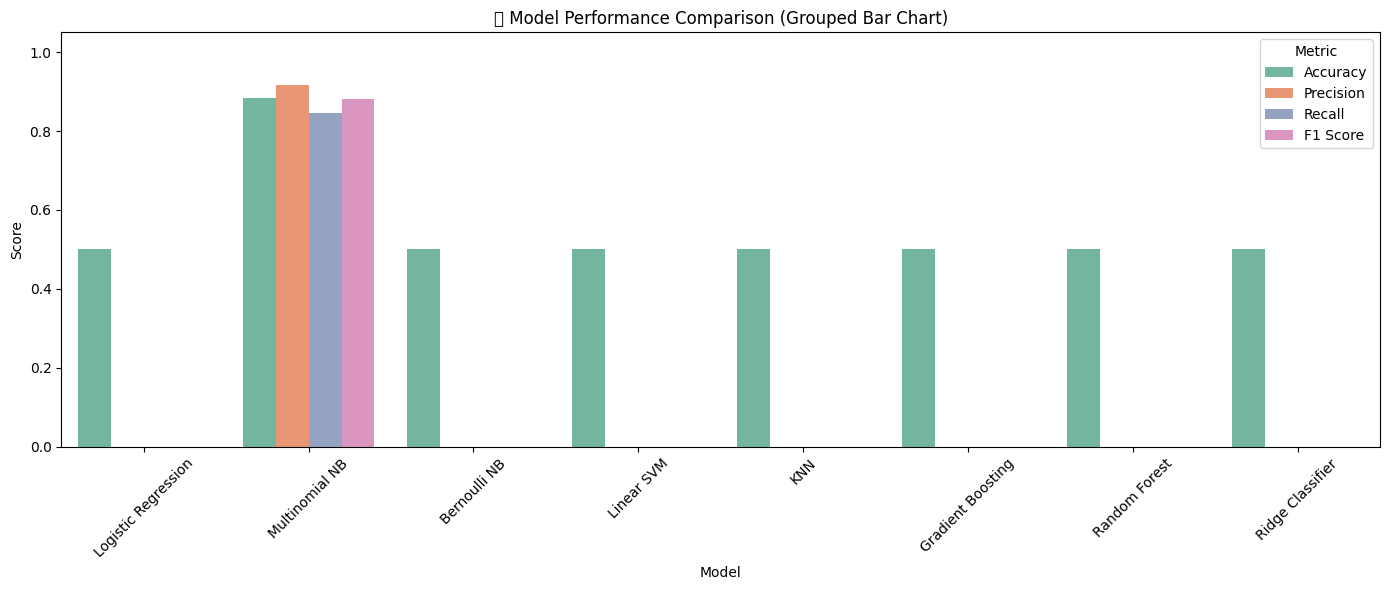

In [24]:
import json
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import defaultdict
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix
)

# Step 1: Load test data
with open("test_3.json", "r", encoding="utf-8") as f:
    test_data = json.load(f)

# Initialize tracking structures
model_correct = defaultdict(int)
model_total = defaultdict(int)
model_predictions = defaultdict(list)
true_labels = []

# Step 2: Collect predictions from API
for idx, item in enumerate(test_data, 1):
    title = item.get("title", "").strip()
    content = item.get("content", "").strip()
    label = item.get("label", None)

    if not title or not content or label is None:
        print(f"⚠️ Skipping sample {idx} due to missing fields")
        continue

    payload = {"title": title, "content": content}
    true_labels.append(label)

    try:
        response = requests.post("http://127.0.0.1:5000/predict", json=payload)
        result = response.json()

        if "predictions" not in result:
            raise ValueError(f"Missing 'predictions' in response: {result}")

        predictions = result["predictions"]
    except Exception as e:
        print(f"❌ Error on sample {idx}: {e}")
        continue

    for model_name, pred in predictions.items():
        try:
            pred = int(pred)
        except:
            continue  # skip models that returned error
        model_total[model_name] += 1
        if pred == label:
            model_correct[model_name] += 1
        model_predictions[model_name].append(pred)

# Step 3: Accuracy bar chart
accuracies = {
    model: round(correct / model_total[model] * 100, 2)
    for model, correct in model_correct.items()
}

plt.figure(figsize=(10, 6))
plt.barh(list(accuracies.keys()), list(accuracies.values()), color="skyblue")
plt.xlabel("Accuracy (%)")
plt.title("Model Accuracy on Test Data")
plt.xlim(0, 100)
for i, (model, acc) in enumerate(accuracies.items()):
    plt.text(acc + 1, i, f"{acc}%", va='center')
plt.tight_layout()
plt.show()

# Step 4: Confusion matrices for each model
n_models = len(model_predictions)
cols = 3
rows = (n_models + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(16, 4 * rows))
axes = axes.flatten()

for i, (model_name, preds) in enumerate(model_predictions.items()):
    cm = confusion_matrix(true_labels, preds)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[i],
                xticklabels=["Fake", "Real"], yticklabels=["Fake", "Real"])
    axes[i].set_title(f"{model_name}")
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")

# Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Confusion Matrices by Model", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()

# Step 5: Grouped bar chart for model metrics
model_names = [
    'Logistic Regression', 'Multinomial NB', 'Bernoulli NB',
    'Linear SVM', 'KNN', 'Gradient Boosting',
    'Random Forest', 'Ridge Classifier'
]

# Collect metrics (fill missing with 0s)
metrics_data = {
    'Model': [], 'Accuracy': [], 'Precision': [],
    'Recall': [], 'F1 Score': []
}

for model_name in model_names:
    preds = model_predictions.get(model_name)
    if preds is not None and len(preds) == len(true_labels):
        metrics_data['Model'].append(model_name)
        metrics_data['Accuracy'].append(accuracy_score(true_labels, preds))
        metrics_data['Precision'].append(precision_score(true_labels, preds, zero_division=0))
        metrics_data['Recall'].append(recall_score(true_labels, preds, zero_division=0))
        metrics_data['F1 Score'].append(f1_score(true_labels, preds, zero_division=0))
    else:
        metrics_data['Model'].append(model_name)
        metrics_data['Accuracy'].append(0.0)
        metrics_data['Precision'].append(0.0)
        metrics_data['Recall'].append(0.0)
        metrics_data['F1 Score'].append(0.0)

df_metrics = pd.DataFrame(metrics_data)
df_melted = df_metrics.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Plot grouped bar chart
plt.figure(figsize=(14, 6))
sns.barplot(data=df_melted, x='Model', y='Score', hue='Metric', palette="Set2")
plt.xticks(rotation=45)
plt.title("📊 Model Performance Comparison (Grouped Bar Chart)")
plt.ylim(0, 1.05)
plt.tight_layout()
plt.show()
